In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import string
import sys
import struct
import csv
from ast import literal_eval
from collections import defaultdict

# Make the graphs a bit prettier, and bigger
matplotlib.style.use('default')
pd.set_option('display.max_colwidth', -1)

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.


plt.rcParams['figure.figsize'] = (15, 5)
arr = np.empty(33)

/opt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
labels = ["creative_id", "country_code", "metro_code", "keyword_count", "kid", "kwt", "kbc", "domain_name", "browser_id", "device_id", "os_id", "url_category", "kwd_category_id", "view_id", "hour_id", "canonical_url_hash", "trim_url", "http_referer", "kwp", "weight", "keyword_impression", "kwd_click", "ad_click", "url_tot_imp", "url_tot_conv", "url_total_revenue", "kwd_tot_imp", "kwd_tot_conv", "kwd_total_revenue", "global_bucket_id", "external_call_bit", "stats_date", "chunk_no"]

In [3]:
df= pd.read_csv("msn_complete_data.csv", sep = ',', error_bad_lines=False, header=None, names = labels)

In [29]:
df['url_tot_conv'].div(df['url_tot_imp'],axis=0).corr(df['kwd_click'])

0.010536233599501814

In [28]:
df.corr()

,creative_id,metro_code,keyword_count,kid,kwt,browser_id,device_id,os_id,kwd_category_id,view_id,hour_id,kwp,weight,keyword_impression,kwd_click,ad_click,url_tot_imp,url_tot_conv,url_total_revenue,kwd_tot_imp,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no
creative_id,1.000000,-0.334003,-0.026832,-0.148922,-0.163673,-0.042497,0.015664,-0.017690,-0.152684,-0.024509,0.008354,-0.044750,-0.008912,-0.001744,-0.012681,-0.010792,-0.067049,-0.086777,-0.065471,0.208179,0.171713,0.232414,-0.340750,0.144485,-0.009974,NaN
metro_code,-0.334003,1.000000,0.035910,0.155134,0.089932,-0.028983,-0.019095,0.002423,0.163732,0.045449,-0.026690,-0.017296,0.009038,0.000869,0.002123,0.000957,-0.057206,-0.056969,-0.070692,-0.172313,-0.157186,-0.176921,0.346882,-0.141516,0.028820,NaN
keyword_count,-0.026832,0.035910,1.000000,-0.000478,-0.063410,0.038704,0.011814,-0.017187,-0.015984,-0.010166,0.010823,-0.057916,0.026858,0.014586,-0.074168,-0.066374,-0.262733,-0.227714,-0.260554,0.031309,-0.009827,0.017440,-0.014147,-0.017392,0.008199,NaN
kid,-0.148922,0.155134,-0.000478,1.000000,-0.030418,-0.019912,0.005501,-0.009530,0.152387,0.009091,-0.028191,0.002332,0.001625,0.001866,0.011817,0.001349,-0.005647,-0.009280,-0.004141,-0.127116,-0.084640,-0.129647,0.296983,-0.129450,0.006781,NaN
kwt,-0.163673,0.089932,-0.063410,-0.030418,1.000000,0.006028,0.003930,-0.005332,0.043517,-0.027936,-0.006016,0.011886,-0.001089,-0.001172,0.020937,0.022905,-0.029809,0.039842,-0.010844,-0.225548,-0.072145,-0.240087,-0.039583,-0.073855,-0.026919,NaN
browser_id,-0.042497,-0.028983,0.038704,-0.019912,0.006028,1.000000,0.132847,-0.110340,-0.006710,0.014677,0.081208,0.011163,0.000316,0.011543,-0.006925,-0.004332,-0.051428,-0.136441,-0.103177,0.010512,0.012076,0.005508,-0.032781,-0.026609,0.019002,NaN
device_id,0.015664,-0.019095,0.011814,0.005501,0.003930,0.132847,1.000000,-0.717168,0.023109,-0.005390,0.059815,0.009594,-0.015351,0.003315,-0.015017,0.001981,-0.092870,-0.048407,-0.079867,-0.011994,-0.017859,-0.010725,0.033540,0.004258,-0.000014,NaN
os_id,-0.017690,0.002423,-0.017187,-0.009530,-0.005332,-0.110340,-0.717168,1.000000,-0.023718,0.001592,-0.052388,-0.011303,0.015494,-0.003821,0.019200,-0.003142,0.121006,0.057144,0.096774,0.015639,0.020503,0.013799,-0.038328,-0.015353,-0.001798,NaN
kwd_category_id,-0.152684,0.163732,-0.015984,0.152387,0.043517,-0.006710,0.023109,-0.023718,1.000000,0.053474,-0.015043,-0.006205,-0.001921,0.002252,0.007434,0.003242,-0.011522,0.001327,-0.012389,-0.139809,-0.063579,-0.130107,0.245717,-0.117726,0.038743,NaN
view_id,-0.024509,0.045449,-0.010166,0.009091,-0.027936,0.014677,-0.005390,0.001592,0.053474,1.000000,0.035500,-0.023452,0.000514,0.003109,0.000892,0.000512,-0.020947,-0.033077,-0.010348,-0.036168,-0.014640,0.024764,-0.011131,0.040450,0.719452,NaN


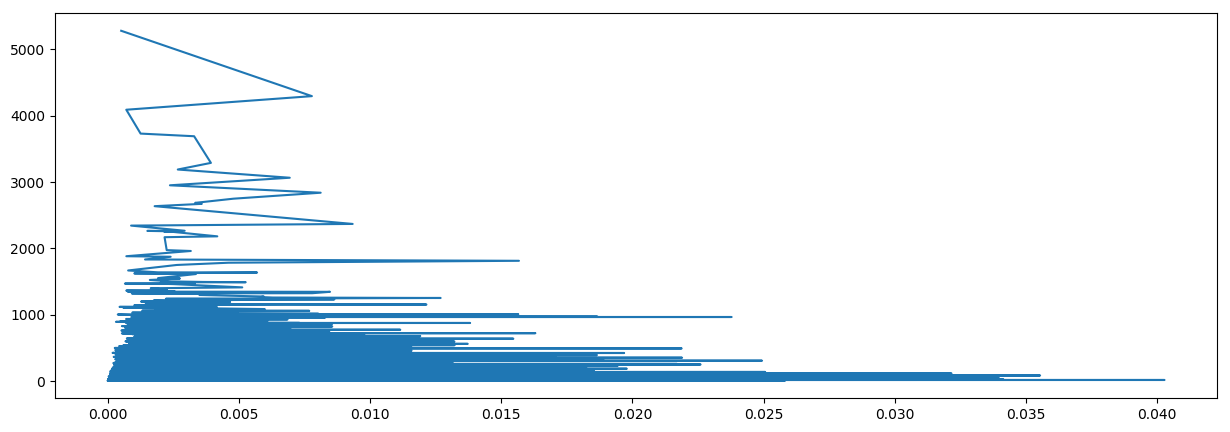

In [45]:
df['url_tot_conv'].div(df['url_tot_imp'],axis=0).value_counts().plot()

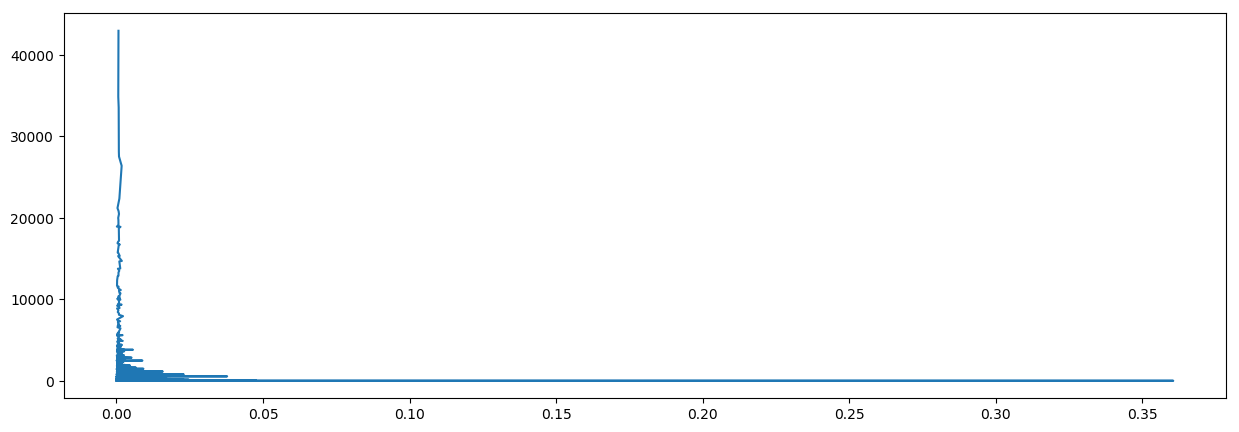

In [37]:
df['kwd_tot_conv'].div(df['kwd_tot_imp'],axis=0).value_counts().plot()

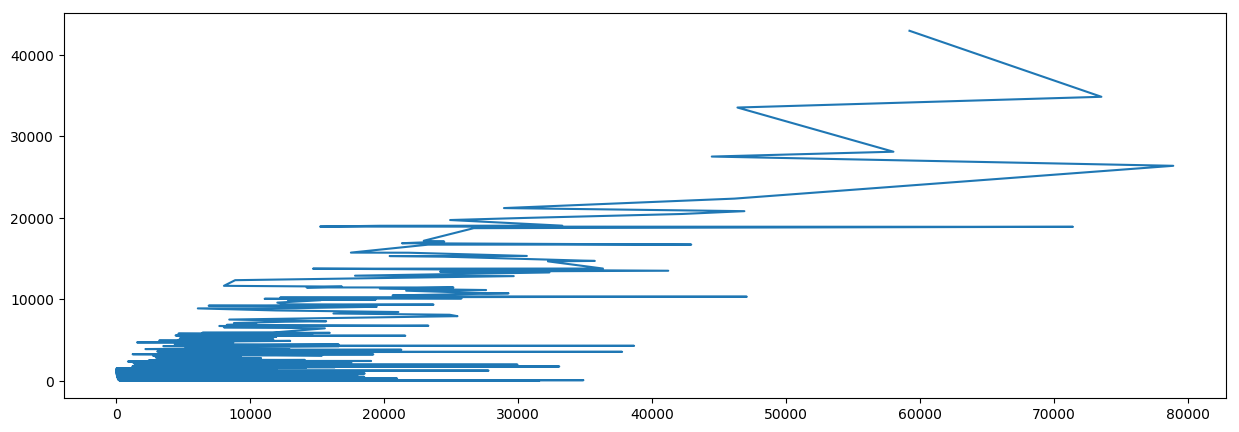

In [38]:
df['kwd_tot_conv'].value_counts().plot()

In [4]:
idMap= pd.read_csv("taxoCatIdMapping.txt", sep = '~', error_bad_lines=False, header=None, names = ['id','Category'])

In [5]:
idDict = dict(zip(idMap.Category,idMap.id))

In [6]:
idDict['Games/Online/BBS_Doors/Trade_Wars_Series/Trade_Wars_2002/Archives'] 

1

In [7]:
url_cat_id = df['url_category'].map(idDict)
testMap = [df['url_category'],url_cat_id]

In [12]:
null_columns= url_cat_id.isnull()
null_categories = df[null_columns]['url_category']

In [13]:
null_categories[null_categories.isnull()==False]

Series([], Name: url_category, dtype: object)

In [14]:
null_categories.value_counts()

Series([], Name: url_category, dtype: int64)

In [8]:
df['url_category_id']=df['url_category'].map(idDict)

In [9]:
df[['url_category','url_category_id','kwd_category_id']][:3]

,url_category,url_category_id,kwd_category_id
0,Home/Family/Parenting/Mothers/Weblogs,77892.0,2133.0
1,Society/Issues/Transportation/Aviation/Accidents,59666.0,107302.0
2,Recreation/Travel/Specialty_Travel/Cruises/Cruise_Lines,2133.0,703.0


In [17]:
df[df['url_category_id']==df['kwd_category_id']].size


4902868

In [18]:
df.shape

(12886181, 34)

In [10]:
relCatFile= pd.read_csv("clustersNew.txt", sep = '~', header=None, names = ['id','red','hisim','dmozrel'])

In [11]:
relCatFile.fillna('');
relCatFile.shape

(99375, 4)

In [5]:
df = pd.read_csv('df_temp.csv')

In [6]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,kwd_redMap,kwd_hisimMap,kwd_dmozrelMap
0,101331275,US,500,2.0,5146035,244,1202540688,msn.com,5,4,...,700.0,852.053638,NaN,1.0,20180501,32,77892.0,[],[],[]
1,101331275,US,501,2.0,321866332,375,107302,msn.com,5,4,...,13758.0,12358.889202,-5903.0,1.0,20180425,32,59666.0,[85894.0],"[85894.0, 120516.0, 105243.0]","[120516.0, 105243.0]"
2,101331275,US,501,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2599.0,1441.625596,NaN,0.0,20180411,32,2133.0,[],[],[]


In [12]:
relCatFile[relCatFile['id']==28]

,id,red,hisim,dmozrel
19,28,20313,NaN,38554


In [13]:
allCats = pd.unique(df[['url_category_id', 'kwd_category_id']].values.ravel('K'))
uniqCats =  allCats[~np.isnan(allCats)]
relCatFile = relCatFile.loc[relCatFile['id'].isin(uniqCats)]

In [14]:
print relCatFile.shape
print uniqCats.size

(9147, 4)
15033


In [24]:
df[df['kwd_category_id']==143544]['kwd_category_id']

57          143544.0
58          143544.0
149         143544.0
261         143544.0
262         143544.0
412         143544.0
479         143544.0
496         143544.0
497         143544.0
498         143544.0
562         143544.0
631         143544.0
639         143544.0
26153       143544.0
28567       143544.0
43164       143544.0
43356       143544.0
43441       143544.0
43531       143544.0
43532       143544.0
43533       143544.0
43741       143544.0
43794       143544.0
43831       143544.0
43842       143544.0
43968       143544.0
44004       143544.0
44020       143544.0
44021       143544.0
44087       143544.0
              ...   
12346296    143544.0
12367911    143544.0
12380035    143544.0
12380052    143544.0
12439301    143544.0
12450339    143544.0
12473030    143544.0
12485104    143544.0
12486580    143544.0
12504066    143544.0
12504088    143544.0
12597144    143544.0
12672293    143544.0
12690034    143544.0
12751828    143544.0
12762214    143544.0
12762589    1

In [25]:
print 143544 in df['url_category_id']
print 28 in df['kwd_category_id']

True
True


In [26]:
uniqCats

array([77892., 59666.,  2133., ..., 64299., 59423., 58423.])

In [123]:
df['kwd_category_id'].value_counts()

-1.0         180761
 15635.0     51655 
 153132.0    45672 
 17479.0     43924 
 108186.0    41460 
 45945.0     32360 
 26987.0     31895 
 120863.0    30158 
 91924.0     29334 
 703.0       27157 
 65096.0     26767 
 106039.0    26399 
 31598.0     24673 
 116852.0    24581 
 29438.0     23029 
 69024.0     22752 
 147536.0    22480 
 61854.0     22388 
 159230.0    20808 
 27177.0     20727 
 107302.0    20293 
 6803.0      19976 
 153771.0    19662 
 117507.0    19652 
 157312.0    19491 
 56840.0     19154 
 62987.0     19064 
 56381.0     18308 
 171576.0    18096 
 71846.0     17666 
             ...   
 33893.0     1     
 34073.0     1     
 34440.0     1     
 34487.0     1     
 35007.0     1     
 35282.0     1     
 35321.0     1     
 35345.0     1     
 31709.0     1     
 31697.0     1     
 31535.0     1     
 31526.0     1     
 27455.0     1     
 27631.0     1     
 27850.0     1     
 27881.0     1     
 28107.0     1     
 28399.0     1     
 29243.0     1     


In [110]:
df.dtypes.to_dict()

{'ad_click': dtype('int64'),
 'browser_id': dtype('int64'),
 'canonical_url_hash': dtype('O'),
 'chunk_no': dtype('int64'),
 'country_code': dtype('O'),
 'creative_id': dtype('int64'),
 'device_id': dtype('int64'),
 'domain_name': dtype('O'),
 'external_call_bit': dtype('float64'),
 'global_bucket_id': dtype('float64'),
 'hour_id': dtype('int64'),
 'http_referer': dtype('O'),
 'kbc': dtype('O'),
 'keyword_count': dtype('float64'),
 'keyword_impression': dtype('int64'),
 'kid': dtype('int64'),
 'kwd_category_id': dtype('float64'),
 'kwd_click': dtype('float64'),
 'kwd_dmozrelMap': dtype('O'),
 'kwd_hisimMap': dtype('O'),
 'kwd_redMap': dtype('O'),
 'kwd_tot_conv': dtype('float64'),
 'kwd_tot_imp': dtype('int64'),
 'kwd_total_revenue': dtype('float64'),
 'kwp': dtype('int64'),
 'kwt': dtype('int64'),
 'metro_code': dtype('int64'),
 'os_id': dtype('int64'),
 'stats_date': dtype('int64'),
 'trim_url': dtype('O'),
 'url_category': dtype('O'),
 'url_category_id': dtype('float64'),
 'url_tot_

In [124]:
len(df['url_category_id'].unique())

6893

In [96]:
uniq = df['url_category_id'].unique()

In [97]:
uniq.dtype

dtype('float64')

In [17]:
relCatFile.shape

(9147, 4)

In [18]:
from collections import defaultdict

def splitDataFrameList(df,target_column,id_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,d,target_column,id_column,separator):
        split_row = row[target_column].split(separator)            
        for s in split_row:
#             print row[id_column]
            if s :
                d[row[id_column]].append(float(s))
#         new_row = row.to_dict()
#         new_row[target_column] = d
#         print d 
#         print "D"
        
    new_rows = defaultdict(list)
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,id_column,separator))
#     print new_rows
    return new_rows

In [19]:
redMap = splitDataFrameList(relCatFile.fillna(''),'red','id',' ')
hisimMap = splitDataFrameList(relCatFile.fillna(''),'hisim','id',' ')
dmozrelMap = splitDataFrameList(relCatFile.fillna(''),'dmozrel','id',' ')

In [20]:
print len(redMap), len(hisimMap), len(dmozrelMap)

7456 4595 3215


In [29]:
len(redMap)

4834

In [30]:
df['kwd_redMap'] = df['kwd_category_id'].map(redMap)
# is_relCats = df['url_category_id'].isin(df['kwd_category_id'].map(redMap))

KeyboardInterrupt: 

In [255]:
df['kwd_hisimMap'] = df['kwd_category_id'].map(hisimMap)
df['kwd_dmozrelMap'] = df['kwd_category_id'].map(dmozrelMap)




In [22]:
df['url_redMap'] = df['url_category_id'].map(redMap)
df['url_hisimMap'] = df['url_category_id'].map(hisimMap)
df['url_dmozrelMap'] = df['url_category_id'].map(dmozrelMap)

KeyboardInterrupt: 

In [31]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,url_tot_conv,url_total_revenue,kwd_tot_imp,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,2.0,4.440000,2073334,700.0,852.053638,NaN,1.0,20180501,32,77892.0
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,6.0,4.771234,23008393,13758.0,12358.889202,-5903.0,1.0,20180425,32,59666.0
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,30.0,24.710660,2586298,2599.0,1441.625596,NaN,0.0,20180411,32,2133.0


In [44]:
df2.to_csv('df_temp.csv',index=False)

In [45]:
df2[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,url_category_id,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,77892,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,59666,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2133,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557


In [9]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,kwd_redMap,kwd_hisimMap,kwd_dmozrelMap
0,101331275,US,500,2.0,5146035,244,1202540688,msn.com,5,4,...,700.0,852.053638,NaN,1.0,20180501,32,77892.0,"['45272', '71070']",['158963'],['']
1,101331275,US,501,2.0,321866332,375,107302,msn.com,5,4,...,13758.0,12358.889202,-5903.0,1.0,20180425,32,59666.0,['85894'],[''],"['120516', '105243']"
2,101331275,US,501,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2599.0,1441.625596,NaN,0.0,20180411,32,2133.0,[],[],[]


In [14]:
def mapColumnUsingDict(df, index_col, dic):
    def mapSingleElement(row,row_acc,index_col,dic):
        row_acc.append(dic[row[index_col]])
#         print("id: %s, map: %s",row[index_col],dic[row[index_col]]);
#         count=count+1;
        if(len(row_acc)%100000 == 0):
            print len(row_acc)
    new_rows = []
    df.apply(mapSingleElement,axis=1,args = (new_rows,index_col,dic))
#     print new_rows
    return new_rows

In [33]:
df2= df.copy(deep=True)

In [34]:
df['kwd_category_id'].isna().value_counts()

False    12785722
True     100459  
Name: kwd_category_id, dtype: int64

In [35]:
df['url_category_id'].isna().value_counts()

False    11612745
True     1273436 
Name: url_category_id, dtype: int64

In [53]:
df['url_category_id'].unique().size

6893

In [38]:
pd.DataFrame.from_dict(redMap)

ValueError: arrays must all be same length

In [56]:
df2.merge(redMap, left_on='kwd_category_id', right_on='id', how='left')

ValueError: can not merge DataFrame with instance of type <type 'collections.defaultdict'>

In [31]:
df['url_redMap'] = df['url_category_id'].map(redMap)

KeyboardInterrupt: 

In [37]:
redMap[df['url_category_id'].unique().tolist]

TypeError: unhashable type: 'numpy.ndarray'

In [36]:
redMapDf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in redMap.iteritems() ]))
hisimMapDf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in hisimMap.iteritems() ]))
dmozrelMapDf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dmozrelMap.iteritems() ]))

KeyboardInterrupt: 

In [31]:
print("%s, %s, %s", redMapDf.shape, hisimMapDf.shape, dmozrelMapDf.shape)

('%s, %s, %s', (36, 4834), (141, 3053), (8, 2184))


In [32]:
notPresentCatsredMap = list(set(uniqCats)-set(redMapDf))
notPresentCatshisimMap = list(set(uniqCats)-set(hisimMapDf))
notPresentCatsdmozrelMap = list(set(uniqCats)-set(dmozrelMapDf))

In [175]:
redMapDf = pd.concat([redMapDf,pd.DataFrame(columns = notPresentCatsredMap)])
hisimMapDf = pd.concat([hisimMapDf,pd.DataFrame(columns = notPresentCatshisimMap)])
dmozrelMapDf = pd.concat([dmozrelMapDf,pd.DataFrame(columns = notPresentCatsdmozrelMap)])
print("%s, %s, %s", redMapDf.shape, hisimMapDf.shape, dmozrelMapDf.shape)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [18]:
redMapDf.fillna(-1)
hisimMapDf.fillna(-1)
dmozrelMapDf.fillna(-1)
redMapDf[-1] = -1
hisimMapDf[-1] = -1
dmozrelMapDf[-1] = -1

In [142]:
redMap.size

AttributeError: 'collections.defaultdict' object has no attribute 'size'

In [21]:
def merge_dicts(x, y, w):
    z = list()   # start with x's keys and values
    for k in x:
        for v in x[k]:
            if [k,v] not in z:
                z.append([k,v])
    for k in y:
        for v in y[k]:
            if [k,v] not in z:
                z.append([k,v])
    for k in w:
        for v in w[k]:
            if [k,v] not in z:
                z.append([k,v])
    # modifies z with y's keys and values & returns None
    return z

In [22]:
temp = 143544
print("%s, %s, %s",hisimMap[temp],redMap[temp],dmozrelMap[temp])

('%s, %s, %s', [48224.0], [], [])


In [23]:
combineMap = merge_dicts(hisimMap,redMap,dmozrelMap)
combineMapKwd = pd.DataFrame(combineMap, columns =['id','relCatKwd'])
combineMapUrl = pd.DataFrame(combineMap, columns =['id','relCatUrl'])
# print combineMap[37644]
# print "hello"
# print hisimMap[37644]

In [24]:
combineMapKwd[combineMapKwd['id'] == 143544]
combineMapUrl[combineMapUrl['id'] == 143544]

,id,relCatUrl
10598,143544,48224.0


In [37]:
print hisimMap.size

AttributeError: 'collections.defaultdict' object has no attribute 'size'

In [48]:
def checkColumnUsingMap(df, index_col, target_col,update_col,mp1):
    def mapSingleElement(row,row_acc,index_col,target_col,update_col,mp1):
        ind = -1 if np.isnan(row[index_col]) else row[index_col]
        row.at[update_col]=row[target_col] in mp1[ind]
        
        row_acc = pd.concat([row_acc,pd.DataFrame(row.copy())])
#         print("id: %s, index_id: %s, map: %s",row[target_col],ind,mp1[ind]);
#         count=count+1;
        if(len(row_acc)%100000 == 0):
            print len(row_acc)
        return row_acc
    new_rows = df[:1]
    new_rows = df.apply(mapSingleElement,axis=1,args = (new_rows,index_col,target_col,update_col,mp1))
    print new_rows
    return new_rows

In [38]:
df2= df.copy()

In [39]:
df2[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,kwd_redMap,kwd_hisimMap,kwd_dmozrelMap
0,101331275,US,500,2.0,5146035,244,1202540688,msn.com,5,4,...,700.0,852.053638,NaN,1.0,20180501,32,77892.0,[],[],[]
1,101331275,US,501,2.0,321866332,375,107302,msn.com,5,4,...,13758.0,12358.889202,-5903.0,1.0,20180425,32,59666.0,[85894.0],"[85894.0, 120516.0, 105243.0]","[120516.0, 105243.0]"
2,101331275,US,501,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2599.0,1441.625596,NaN,0.0,20180411,32,2133.0,[],[],[]


In [43]:
df2 = []

In [25]:
df2 = df.merge(combineMapKwd,how='left', left_on=['kwd_category_id','url_category_id'], right_on = ['id','relCatKwd'])
df2

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_tot_imp,kwd_tot_conv,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,id,relCatKwd
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,2073334,700.0,852.053638,NaN,1.0,20180501,32,77892.0,NaN,NaN
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,23008393,13758.0,12358.889202,-5903.0,1.0,20180425,32,59666.0,NaN,NaN
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2586298,2599.0,1441.625596,NaN,0.0,20180411,32,2133.0,NaN,NaN
3,101331275,US,501.0,2.0,54271218,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,563646,530.0,844.683202,NaN,0.0,20180411,32,2133.0,NaN,NaN
4,101331275,US,504.0,2.0,5658031,375,126942,msn.com,11,4,...,5618655,4805.0,4746.948690,NaN,0.0,20180423,32,82417.0,NaN,NaN
5,101331275,US,506.0,2.0,329474013,390,208::1202540697,msn.com,5,4,...,7383188,6478.0,6648.158197,NaN,1.0,20180411,32,144343.0,NaN,NaN
6,101331275,US,511.0,2.0,168762108,356,-1685197102,msn.com,5,4,...,2392717,2661.0,2957.861241,NaN,1.0,20180428,32,3791.0,NaN,NaN
7,101331275,US,511.0,2.0,18070589,355,NaN,msn.com,5,4,...,7747472,1436.0,1674.761014,NaN,1.0,20180411,32,2133.0,NaN,NaN
8,101331275,US,512.0,2.0,326424659,356,-1516134551,msn.com,5,4,...,233887,270.0,336.425198,-5903.0,1.0,20180411,32,2133.0,NaN,NaN
9,101331275,US,514.0,2.0,48828785,390,208::1202540678,msn.com,14,4,...,2658914,3088.0,2250.739410,NaN,1.0,20180416,32,158110.0,NaN,NaN


In [26]:
df2 = df2.merge(combineMapUrl,how='left', left_on=['url_category_id','kwd_category_id'], right_on = ['id','relCatUrl'])
df2

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,id_x,relCatKwd,id_y,relCatUrl
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,852.053638,NaN,1.0,20180501,32,77892,NaN,NaN,NaN,NaN
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,12358.889202,-5903.0,1.0,20180425,32,59666,NaN,NaN,NaN,NaN
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,1441.625596,NaN,0.0,20180411,32,2133,NaN,NaN,NaN,NaN
3,101331275,US,501.0,2.0,54271218,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,844.683202,NaN,0.0,20180411,32,2133,NaN,NaN,NaN,NaN
4,101331275,US,504.0,2.0,5658031,375,126942,msn.com,11,4,...,4746.948690,NaN,0.0,20180423,32,82417,NaN,NaN,NaN,NaN
5,101331275,US,506.0,2.0,329474013,390,208::1202540697,msn.com,5,4,...,6648.158197,NaN,1.0,20180411,32,144343,NaN,NaN,NaN,NaN
6,101331275,US,511.0,2.0,168762108,356,-1685197102,msn.com,5,4,...,2957.861241,NaN,1.0,20180428,32,3791,NaN,NaN,NaN,NaN
7,101331275,US,511.0,2.0,18070589,355,NaN,msn.com,5,4,...,1674.761014,NaN,1.0,20180411,32,2133,NaN,NaN,NaN,NaN
8,101331275,US,512.0,2.0,326424659,356,-1516134551,msn.com,5,4,...,336.425198,-5903.0,1.0,20180411,32,2133,NaN,NaN,NaN,NaN
9,101331275,US,514.0,2.0,48828785,390,208::1202540678,msn.com,14,4,...,2250.739410,NaN,1.0,20180416,32,158110,NaN,NaN,NaN,NaN


In [27]:
df2.isnull().sum()

creative_id           0       
country_code          0       
metro_code            9       
keyword_count         3       
kid                   0       
kwt                   0       
kbc                   1367373 
domain_name           0       
browser_id            0       
device_id             0       
os_id                 0       
url_category          1273436 
kwd_category_id       100459  
view_id               0       
hour_id               0       
canonical_url_hash    0       
trim_url              0       
http_referer          6161147 
kwp                   0       
weight                0       
keyword_impression    0       
kwd_click             0       
ad_click              0       
url_tot_imp           0       
url_tot_conv          26      
url_total_revenue     29      
kwd_tot_imp           0       
kwd_tot_conv          8312    
kwd_total_revenue     8312    
global_bucket_id      9222819 
external_call_bit     834     
stats_date            0       
chunk_no

In [28]:
df2.shape

(12886181, 38)

In [59]:
df4['kwt'].value_counts()

244    671582
390    571277
355    306749
356    255115
375    210242
369    85427 
208    75892 
316    68802 
374    67788 
284    40044 
266    30725 
310    29424 
386    26560 
307    23757 
367    19591 
283    17222 
240    15328 
329    14327 
330    14188 
348    14143 
344    12372 
350    10925 
331    10835 
364    9608  
65     9423  
203    7057  
416    6968  
388    5704  
345    5269  
387    4408  
410    3728  
267    2300  
417    2077  
110    1899  
349    1777  
341    1437  
281    1260  
232    1094  
340    711   
291    701   
419    586   
201    585   
265    564   
420    540   
418    472   
202    284   
353    251   
225    168   
392    109   
309    107   
361    87    
318    49    
226    34    
360    31    
412    16    
270    10    
306    5     
Name: kwt, dtype: int64

In [61]:
df4[df4['kwt']==307]['isrel'].value_counts()

False    20132
True     3625 
Name: isrel, dtype: int64

In [82]:
colTypeDict = df4.dtypes.to_dict()
colTypeDict
# ['kwd_category_id'].kind == 'f'

{'ad_click': dtype('int64'),
 'browser_id': dtype('int64'),
 'canonical_url_hash': dtype('O'),
 'chunk_no': dtype('int64'),
 'country_code': dtype('O'),
 'creative_id': dtype('int64'),
 'device_id': dtype('int64'),
 'domain_name': dtype('O'),
 'external_call_bit': dtype('float64'),
 'global_bucket_id': dtype('float64'),
 'hour_id': dtype('int64'),
 'http_referer': dtype('O'),
 'id_x': dtype('float64'),
 'id_y': dtype('float64'),
 'isrel': dtype('bool'),
 'kbc': dtype('O'),
 'keyword_count': dtype('float64'),
 'keyword_impression': dtype('int64'),
 'kid': dtype('int64'),
 'kwd_category_id': dtype('O'),
 'kwd_click': dtype('float64'),
 'kwd_dmozrelMap': dtype('O'),
 'kwd_hisimMap': dtype('O'),
 'kwd_redMap': dtype('O'),
 'kwd_tot_conv': dtype('float64'),
 'kwd_tot_imp': dtype('int64'),
 'kwd_total_revenue': dtype('float64'),
 'kwp': dtype('int64'),
 'kwt': dtype('int64'),
 'metro_code': dtype('int64'),
 'os_id': dtype('int64'),
 'relCatKwd': dtype('float64'),
 'relCatUrl': dtype('float64

In [12]:
df4 = pd.read_csv('dfwithrel.csv')

In [13]:
df4[:10]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_dmozrelMap,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual
0,101331275,US,500,2.0,5146035,244,1202540688,msn.com,5,4,...,[],105435.0,77892.0,77892.0,105435.0,True,4.0,7.0,0.000579,0.000411
1,101331275,US,501,2.0,321866332,375,107302,msn.com,5,4,...,"[120516.0, 105243.0]",NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537
2,101331275,US,501,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,[],NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557
3,101331275,US,501,2.0,54271218,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,"[120516.0, 105243.0]",NaN,NaN,NaN,NaN,False,5.0,6.0,0.002155,0.001499
4,101331275,US,504,2.0,5658031,375,126942,msn.com,11,4,...,[],NaN,NaN,NaN,NaN,False,4.0,7.0,0.000603,0.000845
5,101331275,US,506,2.0,329474013,390,208::1202540697,msn.com,5,4,...,[],NaN,NaN,NaN,NaN,False,4.0,7.0,0.002716,0.000900
6,101331275,US,511,2.0,168762108,356,-1685197102,msn.com,5,4,...,[],NaN,NaN,NaN,NaN,False,4.0,7.0,0.000793,0.001236
7,101331275,US,511,2.0,18070589,355,NaN,msn.com,5,4,...,[16493.0],NaN,NaN,NaN,NaN,False,5.0,7.0,0.007534,0.000216
8,101331275,US,512,2.0,326424659,356,-1516134551,msn.com,5,4,...,[14410.0],NaN,NaN,NaN,NaN,False,5.0,6.0,0.007534,0.001438
9,101331275,US,514,2.0,48828785,390,208::1202540678,msn.com,14,4,...,[],NaN,NaN,NaN,NaN,False,4.0,7.0,0.002736,0.000846


In [49]:
df2[['kid','kwd_id']][:3]

KeyError: "['kwd_id'] not in index"

In [52]:
df4.dtypes.to_dict()
['kwd_qual','url_qual','isrel']
['canonical_url_hash','country_code','http_referer','isrel','kwd_category_id','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual']

{'ad_click': dtype('int64'),
 'browser_id': dtype('int64'),
 'canonical_url_hash': dtype('O'),
 'chunk_no': dtype('int64'),
 'country_code': dtype('O'),
 'creative_id': dtype('int64'),
 'device_id': dtype('int64'),
 'domain_name': dtype('O'),
 'external_call_bit': dtype('float64'),
 'global_bucket_id': dtype('float64'),
 'hour_id': dtype('int64'),
 'http_referer': dtype('O'),
 'id_x': dtype('float64'),
 'id_y': dtype('float64'),
 'isrel': dtype('bool'),
 'kbc': dtype('O'),
 'keyword_count': dtype('float64'),
 'keyword_impression': dtype('int64'),
 'kid': dtype('int64'),
 'kwd_category_id': dtype('float64'),
 'kwd_click': dtype('float64'),
 'kwd_conf_class': dtype('float64'),
 'kwd_dmozrelMap': dtype('O'),
 'kwd_hisimMap': dtype('O'),
 'kwd_qual': dtype('float64'),
 'kwd_redMap': dtype('O'),
 'kwd_tot_conv': dtype('float64'),
 'kwd_tot_imp': dtype('int64'),
 'kwd_total_revenue': dtype('float64'),
 'kwp': dtype('int64'),
 'kwt': dtype('int64'),
 'metro_code': dtype('int64'),
 'os_id': dt

In [48]:
df4[['url_tot_imp','url_total_revenue','url_qual']][:5]

,url_tot_imp,url_total_revenue,url_qual
0,7663.720841,4.440000,0.000579
1,5322.234778,4.771234,0.000896
2,11468.222089,24.710660,0.002155
3,11468.222089,24.710660,0.002155
4,2904.690428,1.752825,0.000603


In [40]:
df2['url_conf_class'] = np.ceil(np.log10(df2['url_tot_imp']))
df2['kwd_conf_class'] = np.ceil(np.log10(df2['kwd_tot_imp']))

In [41]:
df2['url_qual'] = df2['url_total_revenue']/df2['url_tot_imp']
df2['kwd_qual'] = df2['kwd_total_revenue']/df2['kwd_tot_imp']

In [43]:
df2[:5]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,url_category_id,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,77892,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,59666,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2133,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557
3,101331275,US,501.0,2.0,54271218,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,2133,NaN,NaN,NaN,NaN,False,5.0,6.0,0.002155,0.001499
4,101331275,US,504.0,2.0,5658031,375,126942,msn.com,11,4,...,82417,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000603,0.000845


In [38]:
ffm_df = df4[['canonical_url_hash','country_code','http_referer','isrel','kwd_category_id','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual']][:3]
ffm_df.dtype

KeyError: "['kwd_tot_revenue'] not in index"

In [41]:
df4[['canonical_url_hash','country_code','http_referer','isrel','kwd_category_id','kwd_tot_conv','kwd_tot_imp','kwd_total_revenue','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual','ad_click']][df4['kwd_qual'].isnull()]

,canonical_url_hash,country_code,http_referer,isrel,kwd_category_id,kwd_tot_conv,kwd_tot_imp,kwd_total_revenue,kwd_conf_class,kwd_qual,kwp,os_id,url_category_id,url_conf_class,url_qual,ad_click
915,e4fb5d98919c183bd5def8376559b94b.d2s,FR,NaN,False,NaN,NaN,2980,NaN,4.0,NaN,1,1,138856.0,5.0,0.000314,0
917,1f706c31ad519e667f60e867d61b0b4b.d2s,FR,NaN,False,-1.0,NaN,1930,NaN,4.0,NaN,3,1,136202.0,4.0,0.000653,0
1011,3e5b29c14bfd46480e97271c895d915d.d2s,FR,NaN,False,-1.0,NaN,2522,NaN,4.0,NaN,2,1,121055.0,5.0,0.003141,0
1051,d06fd798fd784cbf1df3648c9ed7d766.d2s,FR,NaN,False,102915.0,NaN,3037,NaN,4.0,NaN,1,1,48473.0,4.0,0.002107,0
1199,05d5a8287c94af1755a610bca17f8b1a.d2s,FR,www.msn.com,True,136202.0,NaN,1173,NaN,4.0,NaN,1,1,136202.0,4.0,0.000633,0
1388,07fe5d64ad15374014bcd5b56861af1e.d2s,FR,NaN,False,158791.0,NaN,1413,NaN,4.0,NaN,2,1,64178.0,5.0,0.003371,0
1459,780935d07b9707fa17f1f1a11fd94cbf.d2s,FR,www.msn.com,False,-1.0,NaN,3451,NaN,4.0,NaN,3,1,136202.0,4.0,0.001750,0
1478,368961a872522fdca547a8826a033fa2.d2s,FR,NaN,False,19405.0,NaN,1524,NaN,4.0,NaN,2,1,136202.0,5.0,0.002418,0
1561,ecc373d46a777f713bd989e2082d37cf.d2s,FR,NaN,True,136202.0,NaN,2722,NaN,4.0,NaN,3,1,136202.0,5.0,0.008195,0
1803,09948faab55e9ddc9de9fea02f78e9a6.d2s,FR,NaN,False,136202.0,NaN,2287,NaN,4.0,NaN,2,1,22856.0,5.0,0.003199,0


In [3]:
df = pd.read_csv('dfwithpairsim.csv')

In [4]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411,0.011575
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537,0.185832
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557,0.055674


In [5]:
df.groupby('view_id')['view_id'].size

<bound method SeriesGroupBy.size of <pandas.core.groupby.SeriesGroupBy object at 0x7fc936b028d0>>

In [6]:
df[:10]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411,0.011575
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537,0.185832
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557,0.055674
3,101331275,US,501.0,2.0,54271218,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,6.0,0.002155,0.001499,0.045483
4,101331275,US,504.0,2.0,5658031,375,126942,msn.com,11,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000603,0.000845,0.011496
5,101331275,US,506.0,2.0,329474013,390,208::1202540697,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.002716,0.000900,0.010569
6,101331275,US,511.0,2.0,168762108,356,-1685197102,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000793,0.001236,0.005617
7,101331275,US,511.0,2.0,18070589,355,NaN,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.007534,0.000216,0.422173
8,101331275,US,512.0,2.0,326424659,356,-1516134551,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,5.0,6.0,0.007534,0.001438,0.008842
9,101331275,US,514.0,2.0,48828785,390,208::1202540678,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.002736,0.000846,0.016024


In [7]:
df = df.sort_values(by=['view_id','kwp'])

In [8]:
df[['view_id','kwp','url_qual']][:5]

,view_id,kwp,url_qual
203713,1475253706506020098,1,0.000261
1572501,1475253706506020098,2,0.000261
2027743,1475253706506020098,3,0.000261
5507607,1478020974443902762,1,0.000317
6624179,1478020974443902762,2,0.000317


In [152]:
df.columns

Index([u'creative_id', u'country_code', u'metro_code', u'keyword_count',
       u'kid', u'kwt', u'kbc', u'domain_name', u'browser_id', u'device_id',
       u'os_id', u'url_category', u'kwd_category_id', u'view_id', u'hour_id',
       u'canonical_url_hash', u'trim_url', u'http_referer', u'kwp', u'weight',
       u'keyword_impression', u'kwd_click', u'ad_click', u'url_tot_imp',
       u'url_tot_conv', u'url_total_revenue', u'kwd_tot_imp', u'kwd_tot_conv',
       u'kwd_total_revenue', u'global_bucket_id', u'external_call_bit',
       u'stats_date', u'chunk_no', u'url_category_id', u'id_x', u'relCatKwd',
       u'id_y', u'relCatUrl', u'isrel', u'url_conf_class', u'kwd_conf_class',
       u'url_qual', u'kwd_qual', u'cat_pair_sim'],
      dtype='object')

In [9]:
'''
A sci-kit learn inspired script to convert pandas dataframes into libFFM style data.

The script is fairly hacky (hey thats Kaggle) and takes a little while to run a huge dataset.
The key to using this class is setting up the features dtypes correctly for output (ammend transform to suit your needs)
Example below
'''

class FFMFormatPandas:
    field_index_ = None
    feature_index_ = None
    last_idx = 0
    max_feature_index = 0
    count=0
    def __init__(self):
        self.y = None

    def fit(self, df, y=None, t = None):
        self.y = y
        df_ffm = df[df.columns.difference([self.y])]
        if FFMFormatPandas.field_index_ is None:
            FFMFormatPandas.field_index_ = {col: i for i, col in enumerate(df_ffm)}

#         if feature_index_ is not None:
#             last_idx = max(list(self.feature_index_.values()))

        if FFMFormatPandas.feature_index_ is None:
            FFMFormatPandas.feature_index_ = dict()
            FFMFormatPandas.last_idx = 0

        for col in df.columns:
            vals = df[col].unique()
#             col_type = t[col]
            if col not in t:
                print("indexing column:%s",col)
                for val in vals:
                    if pd.isnull(val):
                        continue
                    name = '{}_{}'.format(col, val)
                    if name not in FFMFormatPandas.feature_index_:
                        FFMFormatPandas.feature_index_[name] = FFMFormatPandas.last_idx
                        FFMFormatPandas.last_idx += 1
            if col not in FFMFormatPandas.feature_index_:
                FFMFormatPandas.feature_index_[col] = FFMFormatPandas.last_idx
                FFMFormatPandas.last_idx += 1
        return self

    def fit_transform(self, df, t, y=None):
#         t = df.dtypes.to_dict()
        self.fit(df, y, t)
        return self.transform(df, t)

    def transform_row_(self, row, t, all_cols):
        ffm = []
        feature_data = []
#         print str(float(row[row.index == self.y]>0))
#         print row.index
#         print row
        FFMFormatPandas.count=FFMFormatPandas.count+1
        if(FFMFormatPandas.count%100000==0):
            print FFMFormatPandas.count
        for col, val in enumerate(row,0):
#             print val, col
            col = all_cols[col]
#             print col
            if(col == self.y):
                if self.y != None:
#                     print "appended" + str(float(val>0)) 
                    ffm.append(str(float(val>0)))
                elif self.y is None:
                    ffm.append(str(0))
                continue
            name = '{}_{}'.format(col, val)
            if col not in t:
#                 print('object {}:{}:1'.format(col, name))
                if pd.isnull(val):
                        continue
                if(FFMFormatPandas.feature_index_[name] > FFMFormatPandas.max_feature_index):
                    FFMFormatPandas.max_feature_index = int(FFMFormatPandas.feature_index_[name])
                feature_data.append('{}:{}:1'.format(FFMFormatPandas.field_index_[col], FFMFormatPandas.feature_index_[name]))
            else:
                if pd.isnull(val):
                        continue
#                 print(('int {}:{}:{}'.format(col, FFMFormatPandas.feature_index_[col], val)))
                feature_data.append('{}:{}:{}'.format(FFMFormatPandas.field_index_[col], FFMFormatPandas.feature_index_[col], float(val)))
    
#         print "yes"+str(len(feature_data))+"yes"
        ffm = ffm+feature_data    
#         print len(ffm)
        return ' '.join(ffm)

    def transform(self, df, t):
        print "transforming row to ffm format"
        all_cols = df.columns
        return pd.Series({idx: self.transform_row_(row, t ,all_cols) for idx,row in enumerate(df.itertuples(index = False),1)})

########################### Lets build some data and test ############################
### 


# train, y = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=2, n_classes=2, random_state=42)

# train=pd.DataFrame(train, columns=['int1','int2','int3','s1','s2'])
# train['int1'] = train['int1'].map(int)
# train['int2'] = train['int2'].map(int)
# train['int3'] = train['int3'].map(int)
# train['s1'] = round(np.log(abs(train['s1'] +1 ))).map(str)
# train['s2'] = round(np.log(abs(train['s2'] +1 ))).map(str)
# train['clicked'] = y

ffm_df = df[['canonical_url_hash','cat_pair_sim','country_code','http_referer','isrel','kid','kwd_category_id','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual','ad_click']]
# ffm_df = df6[['isrel','kwd_category_id','kwd_conf_class','kwd_qual','url_category_id','url_conf_class','url_qual','cat_pair_sim','ad_click']]
val_cols = ['kwd_qual','url_qual','isrel','cat_pair_sim']
ffm_train = FFMFormatPandas()
ffm_train_data = ffm_train.fit_transform(ffm_df, val_cols, y='ad_click')
print('Base data')
# print FFMFormatPandas.feature_index_
# print 
print FFMFormatPandas.field_index_ 
print(ffm_df[0:3])
print('FFM data')
print(ffm_train_data[0:5])

('indexing column:%s', 'canonical_url_hash')
('indexing column:%s', 'country_code')
('indexing column:%s', 'http_referer')
('indexing column:%s', 'kid')
('indexing column:%s', 'kwd_category_id')
('indexing column:%s', 'kwd_conf_class')
('indexing column:%s', 'kwp')
('indexing column:%s', 'os_id')
('indexing column:%s', 'url_category_id')
('indexing column:%s', 'url_conf_class')
('indexing column:%s', 'ad_click')
transforming row to ffm format
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
71

In [11]:
with open('feature_dict.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in FFMFormatPandas.feature_index_.items():
       writer.writerow([key, value])
with open('field_dict.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in FFMFormatPandas.field_index_.items():
       writer.writerow([key, value])

In [12]:
with open('feature_dict.csv', 'rb') as csv_file:
    reader = csv.reader(csv_file)
    feature_dict = dict(reader)
with open('field_dict.csv', 'rb') as csv_file:
    reader = csv.reader(csv_file)
    field_dict = dict(reader)

In [10]:
ffm_train_data.shape

(9046612,)

In [37]:
len(FFMFormatPandas.feature_index_)

253220

In [14]:
df[['view_id','url_qual']][7237285:7237290]

,view_id,url_qual
2282358,1524754102769540913,0.000168
4585354,1524754102978285035,0.000735
4585353,1524754102978285035,0.000735
4023068,1524754103129306007,0.000798
616255,1524754103129306007,0.000798


In [13]:
ffm_train_data[0:5]

1    1.0 0:0:1 1:206697:0.00814064202543 2:206698:1 4:207469:0.0 5:207470:1 6:237561:1 7:242902:1 8:242909:0.000548857037465 9:242910:1 10:242923:1 11:242931:1 12:253192:1 13:253198:0.000260616532269
2    1.0 0:0:1 1:206697:0.0737797828856 2:206698:1 4:207469:0.0 5:207471:1 6:237562:1 7:242902:1 8:242909:0.00101485598939 9:242911:1 10:242923:1 11:242931:1 12:253192:1 13:253198:0.000260616532269  
3    0.0 0:0:1 1:206697:0.0265231391138 2:206698:1 4:207469:0.0 5:207472:1 6:237563:1 7:242902:1 8:242909:0.000660155970824 9:242912:1 10:242923:1 11:242931:1 12:253192:1 13:253198:0.000260616532269 
4    0.0 0:1:1 1:206697:0.853022893519 2:206698:1 4:207469:0.0 5:207473:1 6:237564:1 7:242903:1 8:242909:0.000853877881705 9:242910:1 10:242923:1 11:242932:1 12:253193:1 13:253198:0.000316588320229  
5    1.0 0:1:1 1:206697:0.853022893519 2:206698:1 4:207469:0.0 5:207474:1 6:237564:1 7:242903:1 8:242909:0.000407258702207 9:242911:1 10:242923:1 11:242932:1 12:253193:1 13:253198:0.000316588320229  


In [28]:
X_train, X_validation = train_test_split(ffm_train_data, test_size=0.2, random_state=42)
X_train, X_test = train_test_split(X_train, test_size=0.2, random_state=42)
print X_train.shape, X_validation.shape, X_test.shape

(1293938,) (404356,) (323485,)


In [15]:
ffm_train_data[:5427966].to_csv('ffm_train.csv',index = False)
ffm_train_data[5427966:7237288].to_csv('ffm_validate.csv',index = False)
ffm_train_data[7237288:].to_csv('ffm_test.csv',index = False)

In [16]:
X_test = df[7237288:] 
X_train = df[:5427966]

In [17]:
X_test.nunique()

creative_id           309   
country_code          84    
metro_code            742   
keyword_count         7     
kid                   15166 
kwt                   56    
kbc                   13808 
domain_name           1     
browser_id            14    
device_id             6     
os_id                 7     
url_category          5190  
kwd_category_id       3404  
view_id               662302
hour_id               24    
canonical_url_hash    53241 
trim_url              24704 
http_referer          248   
kwp                   12    
weight                48    
keyword_impression    7     
kwd_click             30    
ad_click              15    
url_tot_imp           53241 
url_tot_conv          787   
url_total_revenue     52265 
kwd_tot_imp           14725 
kwd_tot_conv          2351  
kwd_total_revenue     14558 
global_bucket_id      130   
external_call_bit     2     
stats_date            8     
chunk_no              1     
url_category_id       5190  
id_x          

In [21]:
X_test[['view_id','ad_click','kwp','url_qual']][:5]

,view_id,ad_click,kwp,url_qual
4023068,1524754103129306007,0,1,0.000798
616255,1524754103129306007,0,2,0.000798
2096928,1524754103129306007,1,3,0.000798
5857438,1524754104290086831,0,1,0.001853
5297872,1524754104290086831,5,2,0.001853


In [22]:
X_test = X_test.reset_index(drop=True)

In [23]:
X_train = X_train.reset_index(drop=True)
X_train[:5]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,353566216,US,623.0,3.0,47785605,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.000549,0.008141
1,353566216,US,623.0,3.0,27769268,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.001015,0.073780
2,353566216,US,623.0,3.0,66066616,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.000660,0.026523
3,456184085,US,501.0,3.0,72054091,410,500273,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000317,0.000854,0.853023
4,456184085,US,501.0,3.0,116099425,410,500273,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000317,0.000407,0.853023


In [24]:
def calculateMRR(df):
    rank = 1
    prev = -1
    flag = True
    recScore = 0.0
    count = 0
    maxPos = 1
    linecount = 0
    for row in df.itertuples():
#         print row.view_id, row.ad_click, row.kwp
        linecount += 1
        if(linecount%10000==0):
            print linecount
        if(row.view_id!=prev):
            if(flag==False):
                recScore += (1.0/maxPos)
#                 print recScore, row.kwp
            prev = row.view_id
            flag = False
            count += 1
            maxPos = 1
        if(row.ad_click >0 & flag == False):
            recScore += (1.0/row.kwp)
#             print recScore, row.kwp
            flag=True
        if(row.kwp > maxPos):
            maxPos = row.kwp
    if(flag==False):
        recScore += (1.0/maxPos)
#         print recScore, row.kwp
    print count, recScore
    return recScore/count

mrr = calculateMRR(X_test[['view_id','ad_click','kwp']])
mrr

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

0.5945547727695659

In [25]:
X_predict = pd.read_csv('ffm_test.out',header = None)

In [26]:
X_predict.head()

,0
0,0.463345
1,0.301658
2,0.446935
3,0.252612
4,0.450657


In [27]:
X_test['pred'] = X_predict

In [28]:
X_test[['view_id','ad_click','kwp','url_qual','pred']][:10]

,view_id,ad_click,kwp,url_qual,pred
0,1524754103129306007,0,1,0.000798,0.463345
1,1524754103129306007,0,2,0.000798,0.301658
2,1524754103129306007,1,3,0.000798,0.446935
3,1524754104290086831,0,1,0.001853,0.252612
4,1524754104290086831,5,2,0.001853,0.450657
5,1524754104290086831,0,3,0.001853,0.210179
6,1524754104558716591,0,1,0.000756,0.587363
7,1524754104558716591,0,2,0.000756,0.302011
8,1524754104558716591,1,3,0.000756,0.401014
9,1524754105429969630,0,1,0.002525,0.286077


In [29]:
X_test_with_preds = X_test.sort_values(by=['view_id','pred'],ascending = [True,False])

In [30]:
X_test_with_preds[['view_id','ad_click','kwp','url_qual','pred']][:10]

,view_id,ad_click,kwp,url_qual,pred
0,1524754103129306007,0,1,0.000798,0.463345
2,1524754103129306007,1,3,0.000798,0.446935
1,1524754103129306007,0,2,0.000798,0.301658
4,1524754104290086831,5,2,0.001853,0.450657
3,1524754104290086831,0,1,0.001853,0.252612
5,1524754104290086831,0,3,0.001853,0.210179
6,1524754104558716591,0,1,0.000756,0.587363
8,1524754104558716591,1,3,0.000756,0.401014
7,1524754104558716591,0,2,0.000756,0.302011
11,1524754105429969630,0,3,0.002525,0.500741


In [31]:
def calculateMRR(df):
    rank = 1
    prev = -1
    flag = True
    recScore = 0.0
    count = 0
    maxPos = 1
    linecount = 0
    for row in df.itertuples():
#         print row.view_id, row.ad_click, row.kwp
        linecount += 1
        if(linecount%10000==0):
            print linecount
        if(row.view_id!=prev):
            if(flag==False):
                recScore += (1.0/maxPos)
#                 print recScore, maxPos
            prev = row.view_id
            flag = False
            rank = 1
            count += 1
            maxPos = 1
        if(row.ad_click >0 & flag == False):
            recScore += (1.0/rank)
#             print recScore, rank
            flag=True
        if(row.kwp > maxPos):
            maxPos = row.kwp
        rank+=1
    if(flag==False):
        recScore += (1.0/maxPos)
#         print recScore, row.kwp
    print count, recScore
    return recScore/count

mrr = calculateMRR(X_test_with_preds[['view_id','ad_click','kwp','url_qual','pred']])
mrr

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

0.7123856458022764

In [32]:
df['ad_click'].dtype

dtype('int64')

In [33]:
FFMFormatPandas.max_feature_index

253196

In [34]:
FFMFormatPandas.field_index_

{'canonical_url_hash': 0,
 'cat_pair_sim': 1,
 'country_code': 2,
 'http_referer': 3,
 'isrel': 4,
 'kid': 5,
 'kwd_category_id': 6,
 'kwd_conf_class': 7,
 'kwd_qual': 8,
 'kwp': 9,
 'os_id': 10,
 'url_category_id': 11,
 'url_conf_class': 12,
 'url_qual': 13}

In [12]:
def show_sizeof(x, level=0):

    print "\t" * level, x.__class__, sys.getsizeof(x), x

    if hasattr(x, '__iter__'):
        if hasattr(x, 'items'):
            for xx in x.items():
                show_sizeof(xx, level + 1)
        else:
            for xx in x:
                show_sizeof(xx, level + 1)


 <type 'int'> 24 3


In [33]:
uniqcnts = df6.apply(pd.Series.nunique)
uniqcnts

creative_id           117    
country_code          89     
metro_code            799    
keyword_count         6      
kid                   17206  
kwt                   55     
kbc                   15438  
domain_name           1      
browser_id            16     
device_id             6      
os_id                 7      
url_category          6413   
kwd_category_id       3685   
view_id               1273131
hour_id               24     
canonical_url_hash    84849  
trim_url              36511  
http_referer          311    
kwp                   6      
weight                33     
keyword_impression    10     
kwd_click             32     
ad_click              17     
url_tot_imp           84846  
url_tot_conv          875    
url_total_revenue     83193  
kwd_tot_imp           16740  
kwd_tot_conv          2417   
kwd_total_revenue     16511  
global_bucket_id      79     
external_call_bit     2      
stats_date            31     
chunk_no              1      
url_catego

In [38]:
with open("libffm/ffm_train.csv.model", "rb") as binary_file:
    binary_file.seek(0)  # Go to beginning
#     n = binary_file.read(4)
    n = struct.unpack("<L",binary_file.read(4))[0]
    m = struct.unpack("<L",binary_file.read(4))[0]
    k = struct.unpack("<L",binary_file.read(4))[0]
    norm = struct.unpack("b",binary_file.read(1))[0]
    print n, m, k, norm
    w_size = n*m*k*2;
    modeldf = pd.DataFrame()
    for p in range(3):
        row_vector = list()
        for q in range(m):
            
            vec1 = list()
            vec2 = list()
            for r in range(k):
                val = struct.unpack('f',binary_file.read(4))[0]
                vec1.append(val)
#                 struct.unpack('f',binary_file.read(4))
            for r in range(k):
                val = struct.unpack('f',binary_file.read(4))[0]
                vec2.append(val)
            vec1 = np.array(vec1)
#             vec2 = np.array(vec2)
            
            print vec1, vec2
#             print "yes"
            row_vector.append(vec1)
#             print row_vector
#             print "no"
#         print "done"
        
        row_vector = pd.Series(row_vector)
        modeldf = pd.concat([modeldf,row_vector.T],ignore_index = False, axis = 1)
        if(p%1000==0):
            print p
#         print row_vector
#     print modeldf
    
    
    

95384 13 4 1
[3.91295180e-06 1.00000000e+00 6.57688975e-02 1.00000000e+00] [0.37780267000198364, 1.0, 0.229325070977211, 1.0]
[0.25950637 1.0006181  0.10568787 1.00018227] [0.019930019974708557, 1.0001628398895264, 0.33306217193603516, 1.0005440711975098]
[0.34653762 1.00289965 0.47302955 1.00273693] [0.19278950989246368, 1.0022375583648682, 0.2594025433063507, 1.0017080307006836]
[0.41548267 1.         0.01728605 1.        ] [0.026730816811323166, 1.0, 0.26485010981559753, 1.0]
[0.33760771 1.00005591 0.00404552 1.00001359] [0.19598756730556488, 1.0002422332763672, 0.03708851337432861, 1.000168800354004]
[0.19243503 1.00194454 0.33265728 1.00126791] [0.28672072291374207, 1.0007978677749634, 0.4694131016731262, 1.001855492591858]
[0.42595252 1.01209962 0.2645812  1.01957381] [0.044549889862537384, 1.0011101961135864, 0.326089084148407, 1.004186749458313]
[0.20799443 1.         0.35058644 1.        ] [0.455148845911026, 1.0, 0.3810897767543793, 1.0]
[0.08113313 1.01635242 0.03048102 1.00

In [28]:
modeldf[:3]

,0,0,0
0,"[-5.995021637609175e-37, -7.567011707354012e-44, -6.68977451075625e-35, -8.547920632381384e-44]","[-1.9897486413760553e+31, -8.547920632381384e-44, 2.967331187732692e-31, -8.688050478813866e-44]","[-3.0806918178375773e-21, -8.547920632381384e-44, -6.81480247837464e-28, -8.688050478813866e-44]"
1,"[-5.219676695273379e-36, -1.8601144101109773e-39, -1068214133981184.0, -5.48587329306201e-40]","[5.4393931566082995e+34, -2.763108337924961e-40, -1.324781658619074e+23, -8.582392574603775e-41]","[-1.9212232650065434e-30, -9.230989174010374e-39, -3.9321946069218295e-37, -3.2889455866628484e-39]"
2,"[-3.4543317095625525e-09, -8.725893945141422e-39, -3.50447254929366e+30, -8.236224209767758e-39]","[-3.5006055492062544e+19, -2.482517378103031e-38, 2.4351149488176278e+30, -2.0914903665673552e-38]","[-6.870212893607472e-35, -2.7297092298068574e-37, -8.337650790013338e+16, -1.5804097435417637e-37]"


In [39]:
with open("libffm/ffm_train.csv.model", "rb") as binary_file:
    binary_file.seek(0)  # Go to beginning
#     n = binary_file.read(4)
    n = struct.unpack("<L",binary_file.read(4))[0]
    m = struct.unpack("<L",binary_file.read(4))[0]
    k = struct.unpack("<L",binary_file.read(4))[0]
    norm = struct.unpack("b",binary_file.read(1))[0]
    print n, m, k
    w_size = n*m*k*2;
#     modeldf = pd.DataFrame()
    dt = np.dtype([('canonical_url_hash', 'f4', ((8,))), ('cat_pair_sim', 'f4', ((8,))), ('country_code', 'f4', ((8,))), ('http_referer', 'f4', ((8,))), 
                   ('isrel', 'f4', ((8,))), ('kid', 'f4', ((8,))), ('kwd_category_id', 'f4', ((8,))), ('kwd_conf_class', 'f4', ((8,))), 
                   ('kwd_qual', 'f4', ((8,))), ('kwp', 'f4', ((8,))), ('os_id', 'f4', ((8,))), 
                   ('url_category_id', 'f4', ((8,))), ('url_conf_class', 'f4', ((8,))), ('url_qual', 'f4', ((8,))) 
                   ])
    data = np.fromfile(binary_file, dtype=dt)
    modeldf = pd.DataFrame(data.tolist(), columns=data.dtype.names)
    
    
    

253199 14 4


In [40]:
modeldf.shape

(253199, 14)

In [41]:
modeldf[85250:85254]

,canonical_url_hash,cat_pair_sim,country_code,http_referer,isrel,kid,kwd_category_id,kwd_conf_class,kwd_qual,kwp,os_id,url_category_id,url_conf_class,url_qual
85250,"[0.088808216, 1.0, 0.09968178, 1.0, 0.35165334, 1.0, 0.2377201, 1.0]","[0.36191028, 1.0000015, 0.17443036, 1.0000007, 0.082627766, 1.0000002, 0.42231464, 1.0000007]","[0.27570313, 1.0000243, 0.49030232, 1.0007464, 0.48385236, 1.0002204, 0.45490095, 1.0000573]","[0.19197476, 1.0001471, 0.23256515, 1.0000215, 0.091677114, 1.000305, 0.4760654, 1.0002143]","[0.3444559, 1.0, 0.3244366, 1.0, 0.35542312, 1.0, 0.15045698, 1.0]","[0.25675115, 1.0021929, 0.37627798, 1.0027069, 0.24160416, 1.0031509, 0.46354786, 1.0026164]","[0.3766978, 1.0040765, 0.47628668, 1.0021765, 0.034492355, 1.0004315, 0.23990268, 1.0005941]","[0.3713145, 1.0013361, 0.29963538, 1.001473, 0.4580146, 1.0005406, 0.23345526, 1.0028077]","[0.020399796, 1.0, 0.36218715, 1.0, 0.3329612, 1.0, 0.12845096, 1.0]","[0.38684434, 1.0047159, 0.16829576, 1.0009949, 0.38501406, 1.003978, 0.23127376, 1.001146]","[0.021519674, 1.0062691, 0.20859516, 1.0023232, 0.4508816, 1.0012288, 0.19284669, 1.0101572]","[0.107792236, 1.0026393, 0.40837392, 1.0015273, 0.36447215, 1.0001261, 0.27075756, 1.0000612]","[0.29614213, 1.0008024, 0.1888275, 1.0000174, 0.17217585, 1.0000199, 0.4663804, 1.0007554]","[0.077869214, 1.0, 0.25954115, 1.0, 0.14882849, 1.0, 0.38302281, 1.0]"
85251,"[0.022913584, 1.0, 0.10861463, 1.0, 0.48608053, 1.0, 0.05564537, 1.0]","[0.23168156, 1.0, 0.14054161, 1.0, 0.21207598, 1.0, 0.16588397, 1.0]","[0.27550167, 1.0005383, 0.20351416, 1.008084, 0.35104895, 1.0024561, 0.38313287, 1.0006964]","[0.14592135, 1.0003026, 0.18918736, 1.0000459, 0.21862264, 1.0005945, 0.008850092, 1.0004445]","[0.48890874, 1.0, 0.3827289, 1.0, 0.16929553, 1.0, 0.12281017, 1.0]","[0.2778766, 1.045515, 0.14613211, 1.0167595, 0.4460419, 1.0333942, 0.4591329, 1.0208064]","[0.04327742, 1.0258754, 0.21894647, 1.0339761, 0.19996004, 1.0215746, 0.31362998, 1.0043522]","[0.3011944, 1.0142477, 0.32049665, 1.0236495, 0.1442132, 1.0045025, 0.1347589, 1.0263277]","[0.4252474, 1.0, 0.3304476, 1.0, 0.37201566, 1.0, 0.08577166, 1.0]","[0.18769188, 1.0495183, 0.057076152, 1.0147364, 0.3666339, 1.05692, 0.19021225, 1.0075365]","[0.3367119, 1.0173432, 0.28124174, 1.0090506, 0.31207523, 1.0198885, 0.19972868, 1.0213498]","[0.059861913, 1.016269, 0.025986752, 1.0146043, 0.39467496, 1.0310246, 0.08233023, 1.0426313]","[0.2829223, 1.0183151, 0.067412995, 1.0039147, 0.27977198, 1.0000709, 0.07531707, 1.0112002]","[0.025825089, 1.0, 0.083982475, 1.0, 0.13290484, 1.0, 0.4489086, 1.0]"
85252,"[0.04959005, 1.0, 0.4600257, 1.0, 0.15178768, 1.0, 0.09552511, 1.0]","[0.49004, 1.000018, 0.31101748, 1.0000093, 0.0370341, 1.0000057, 0.2906096, 1.00001]","[0.23323601, 1.0000101, 0.44110706, 1.0005, 0.45901948, 1.0001488, 0.47020686, 1.0000343]","[0.045968965, 1.000088, 0.058788642, 1.0000156, 0.40772453, 1.0001911, 0.19533274, 1.0001698]","[0.045451377, 1.0, 0.40579996, 1.0, 0.32212904, 1.0, 0.055707335, 1.0]","[0.27599582, 1.0005695, 0.26109084, 1.0011358, 0.44417536, 1.0013335, 0.09166389, 1.0009977]","[0.49456382, 1.0018163, 0.21381116, 1.0029203, 0.37144676, 1.0000663, 0.29833806, 1.0026672]","[0.3259281, 1.000266, 0.16990332, 1.0021354, 0.41127533, 1.0000573, 0.40172088, 1.0000194]","[0.32129848, 1.0, 0.09658303, 1.0, 0.2826173, 1.0, 0.4789871, 1.0]","[0.3801217, 1.0046107, 0.1470986, 1.0013973, 0.060352214, 1.0061673, 0.3713489, 1.0001543]","[0.24706148, 1.0004125, 0.21731654, 1.0001296, 0.17739767, 1.0015442, 0.28589088, 1.000297]","[0.09111625, 1.0000634, 0.35893616, 1.0019966, 0.45123494, 1.0002381, 0.33984673, 1.0012406]","[0.22606929, 1.0005469, 0.4311695, 1.000012, 0.38859755, 1.0000105, 0.4240156, 1.0005047]","[0.15140986, 1.0, 0.2618776, 1.0, 0.40474507, 1.0, 0.09229694, 1.0]"
85253,"[0.2450615, 1.0, 0.24877326, 1.0, 0.13215607, 1.0, 0.14726669, 1.0]","[0.11107234, 1.0, 0.26724222, 1.0, 0.12719786, 1.0, 0.3320763, 1.0]","[0.31622124, 1.0215707, 0.36729008,

In [42]:
modeldf[:3]

,canonical_url_hash,cat_pair_sim,country_code,http_referer,isrel,kid,kwd_category_id,kwd_conf_class,kwd_qual,kwp,os_id,url_category_id,url_conf_class,url_qual
0,"[3.912952e-06, 1.0, 0.0657689, 1.0, 0.37780267, 1.0, 0.22932507, 1.0]","[0.26621264, 1.0000234, 0.10934426, 1.0000117, 0.023461472, 1.000006, 0.33930865, 1.0000111]","[0.3418671, 1.072258, 0.46800655, 1.0017103, 0.19419259, 1.0900681, 0.26078522, 1.0259795]","[0.41580808, 1.0009983, 0.017291442, 1.001462, 0.027182382, 1.0011964, 0.2645052, 1.0017385]","[0.3355442, 1.0, 0.0038487248, 1.0, 0.1916898, 1.0, 0.033418, 1.0]","[0.19455938, 1.0085372, 0.33633265, 1.0298289, 0.3011576, 1.0240008, 0.4687761, 1.0254045]","[0.43052548, 1.0265613, 0.25964308, 1.0173615, 0.015081304, 1.0167596, 0.32362786, 1.0211076]","[0.20465897, 1.0069294, 0.35147518, 1.032173, 0.45795807, 1.0015244, 0.36798862, 1.0086125]","[0.13121398, 1.0, 0.023729477, 1.0, 0.36800712, 1.0, 0.16410156, 1.0]","[0.32356423, 1.0712723, 0.37860525, 1.0210205, 0.50934196, 1.0759766, 0.1674147, 1.0122297]","[0.12441908, 1.0076835, 0.4916962, 1.0022773, 0.3630856, 1.0284934, 0.37717396, 1.0056466]","[0.32394403, 1.0615921, 0.03638794, 1.0002282, 0.31483683, 1.0195339, 0.44180393, 1.0053566]","[0.13779528, 1.019994, 0.21870625, 1.0040405, 0.3830753, 1.0000832, 0.23971052, 1.0126325]","[0.11887601, 1.0, 0.13744023, 1.0, 0.17961597, 1.0, 0.08324578, 1.0]"
1,"[0.24325868, 1.0, 0.44882813, 1.0, 0.45460406, 1.0, 0.030282164, 1.0]","[0.4511799, 1.0009133, 0.2513163, 1.0004654, 0.2576007, 1.0002536, 0.15883012, 1.0004368]","[0.48970658, 1.0149775, 0.24644601, 1.0003456, 0.12906921, 1.0187055, 0.043113854, 1.0053118]","[0.47388214, 1.0, 0.036874536, 1.0, 0.25035354, 1.0, 0.19207108, 1.0]","[0.13853768, 1.0, 0.456898, 1.0, 0.26486725, 1.0, 0.2322172, 1.0]","[0.4724914, 1.006005, 0.027671799, 1.004735, 0.38289315, 1.0017958, 0.38967177, 1.0075333]","[0.4161905, 1.0113035, 0.064645156, 1.0071039, 0.011410696, 1.0073426, 0.3468052, 1.0068365]","[0.43487346, 1.0029955, 0.3074097, 1.0046976, 0.3674474, 1.0010641, 0.36866274, 1.0053219]","[0.49971688, 1.0, 0.44427547, 1.0, 0.11659468, 1.0, 0.15315738, 1.0]","[0.17389086, 1.0048844, 0.25927687, 1.0020992, 0.29133278, 1.005023, 0.43104714, 1.0015094]","[0.20483926, 1.0015835, 0.42008844, 1.000464, 0.13255535, 1.0058142, 0.20654161, 1.0011395]","[0.27028465, 1.0034679, 0.23471573, 1.0005893, 0.14592142, 1.0072241, 0.08904723, 1.0001448]","[0.07555187, 1.0020144, 0.28552544, 1.0000612, 0.40124768, 1.0000522, 0.015320204, 1.0019599]","[0.26721844, 1.0, 0.24923411, 1.0, 0.47766894, 1.0, 0.37413728, 1.0]"
2,"[0.27729192, 1.0, 0.44536874, 1.0, 0.31242466, 1.0, 0.4210198, 1.0]","[0.08041268, 1.0000436, 0.10673449, 1.00002, 0.35762987, 1.0000122, 0.06558505, 1.0000216]","[0.046213593, 1.0037215, 0.13740404, 1.0000601, 0.0023110616, 1.0047153, 0.20758787, 1.001334]","[0.013438145, 1.0, 0.3549098, 1.0, 0.46894866, 1.0, 0.119955406, 1.0]","[0.09044715, 1.0, 0.1587683, 1.0, 0.4434913, 1.0, 0.32602638, 1.0]","[0.073704064, 1.00187, 0.33998677, 1.0016338, 0.19109705, 1.0007176, 0.19615169, 1.0010481]","[0.25172067, 1.0030063, 0.07948444, 1.0046616, 0.29601648, 1.0040469, 0.4266591, 1.0031699]","[0.29608765, 1.0005189, 0.4753903, 1.0014632, 0.2770195, 1.000137, 0.07631959, 1.0006762]","[0.49164808, 1.0, 0.20438148, 1.0, 0.07090923, 1.0, 0.28244674, 1.0]","[0.124471694, 1.0019264, 0.24419786, 1.0007381, 0.22939068, 1.0021689, 0.48286116, 1.000352]","[0.06323111, 1.0003997, 0.100023344, 1.00011, 0.16002576, 1.0014453, 0.3148381, 1.0003014]","[0.06289442, 1.0019118, 0.32570648, 1.0000073, 0.3104397, 1.0013239, 0.40134105, 1.0004414]","[0.12425972, 1.0010349, 0.23835756, 1.0002244, 0.19466722, 1.000007, 0.10190512, 1.000679]","[0.014187454, 1.0, 0.45083272, 1.0, 0.21324676, 1.0, 0.07100986, 1.0]"


In [52]:
hashcount = X_train['canonical_url_hash'][(X_train['kwt'].isin([266,410,307,344,317,338,265,410,344]))].value_counts().reset_index()
hashcount.columns = ['hash','count']

In [53]:
hashcount[150:160]

,hash,count
150,21e3554c15fe7acf217e655d66a03af8.d2s,159
151,24b0aa8ff0d29deada4c801d193a452e.d2s,158
152,a5aa5022e6a367126de017035ac4bc90.d2s,158
153,9e7898f4b2a4c4a67749accdf574d8da.d2s,158
154,3bf4e7c26c1c7c92f777c1ab0bf0d440.d2s,157
155,c031ce6630d087b517ca31de01ff1803.d2s,156
156,d3f4f3126a73892eb8a5d464c6ee3cff.d2s,155
157,7f252433e67af14b9508afd26ee746c9.d2s,155
158,52da7da44cd36a2679a326dc9fbc4564.d2s,154
159,e212650e7e47c2594f0a6c005ffb20f0.d2s,153


In [57]:
feature_dict['canonical_url_hash_21e3554c15fe7acf217e655d66a03af8.d2s']

'64'

In [52]:
df['kwt'].unique()

array([244, 410, 390, 375, 208, 374, 355, 307, 310, 386, 387, 416, 331,
       356,  65, 316, 284, 367, 329, 318, 344, 266, 232, 203, 330, 240,
       265, 283, 267, 340, 361, 110, 341, 281, 291, 225, 201, 306, 202,
       392, 353, 370, 364, 270, 360, 345, 309, 349, 348, 369, 350, 226,
       282, 275, 388, 417, 204, 389, 371, 418, 419, 420])

In [58]:
df['kid'][(df['canonical_url_hash']=='21e3554c15fe7acf217e655d66a03af8.d2s')].unique().size

91

In [55]:
field_dict

{'canonical_url_hash': '0',
 'cat_pair_sim': '1',
 'country_code': '2',
 'http_referer': '3',
 'isrel': '4',
 'kid': '5',
 'kwd_category_id': '6',
 'kwd_conf_class': '7',
 'kwd_qual': '8',
 'kwp': '9',
 'os_id': '10',
 'url_category_id': '11',
 'url_conf_class': '12',
 'url_qual': '13'}

In [56]:
inv_field_dict = {v: k for k, v in field_dict.iteritems()}
inv_field_dict

{'0': 'canonical_url_hash',
 '1': 'cat_pair_sim',
 '10': 'os_id',
 '11': 'url_category_id',
 '12': 'url_conf_class',
 '13': 'url_qual',
 '2': 'country_code',
 '3': 'http_referer',
 '4': 'isrel',
 '5': 'kid',
 '6': 'kwd_category_id',
 '7': 'kwd_conf_class',
 '8': 'kwd_qual',
 '9': 'kwp'}

In [59]:
df[:5427966][(df['canonical_url_hash']=='21e3554c15fe7acf217e655d66a03af8.d2s')].size

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


13948

In [72]:
testdf= X_train[(X_train['canonical_url_hash']=='21e3554c15fe7acf217e655d66a03af8.d2s')].groupby('kid').first().reset_index()

In [75]:
testdf[:3]

,kid,creative_id,country_code,metro_code,keyword_count,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,3482627,755526452,US,510.0,12.0,390,266::108325,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.001008,0.002045,0.010461
1,3486477,755526452,US,560.0,12.0,65,not found,msn.com,6,2,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.001008,0.001513,0.011884
2,3491572,755526452,US,560.0,12.0,374,102810,msn.com,6,2,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.001008,0.001152,0.061102


In [87]:
coltouse=['0','1','4','5','6','7','8','11','12','13'];
testdf = X_train[(X_train['canonical_url_hash']=='acd7426b134eef66d2cd8d5257d04f20.d2s')].head(1)
testdf = pd.concat([testdf,X_train[(X_train['canonical_url_hash']=='326aa3329006cbd18c1a6d20aef87193.d2s')].head(1)])
testdf= pd.DataFrame()
url_hashes = hashcount[150:160]['hash']
for url_hash in url_hashes:
    hashdf = X_train[(X_train['canonical_url_hash']==url_hash)].groupby('kid').first().reset_index()
    testdf = pd.concat([testdf,hashdf])

testdf.shape

(1204, 44)

In [79]:
testdf[['canonical_url_hash','cat_pair_sim','country_code','http_referer','isrel','kwd_category_id','kid','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual','ad_click']]

,canonical_url_hash,cat_pair_sim,country_code,http_referer,isrel,kwd_category_id,kid,kwd_conf_class,kwd_qual,kwp,os_id,url_category_id,url_conf_class,url_qual,ad_click
700683,acd7426b134eef66d2cd8d5257d04f20.d2s,0.080505,US,www.msn.com,False,57309.0,59773287,7.0,0.001054,1,1,58925.0,6.0,0.00127,0


In [88]:
name = '{}_{}'.format('kwd_category_id',57309.0)
print name
feature_dict[name]

kwd_category_id_57309.0


'237774'

In [89]:
val_cols = ['kwd_qual','url_qual','isrel','cat_pair_sim']
def orderKwds(coltouse,df,val_cols,modeldf, feature_dict):
    resultDf = pd.DataFrame();
    totcount=0
    for index,entry in df.iterrows():
        row = []
        r=0.0
        prod=0.0
        totcount+=1
        if(totcount%100==0):
            print totcount
        for i in coltouse:
            val1 = 1.0 
#             print i,val1
            row.append(entry[inv_field_dict[i]])
            if(inv_field_dict[i] in val_cols):
                val1=float(entry[inv_field_dict[i]])
                r+=val1*val1
                name1= inv_field_dict[i]
                vec1=modeldf.loc[int(feature_dict[inv_field_dict[i]])]
#                 print("r%s name1 %s val %s valcolumn vec1%s",r,name1,val1,vec1)
            else:
                r+=1.0
                name1='{}_{}'.format(inv_field_dict[i],entry[inv_field_dict[i]])
    #             print name1
                vec1=modeldf.loc[int(feature_dict[name1])]
#                 print("r%s name1 %s catcolumn vec1%s",r,name1,vec1)
            for j in coltouse:
                if(i==j):
                    continue
                val2 = 1.0
#                 print("j%s val1%s",j,val2)
                if(inv_field_dict[j] in val_cols):
                    name2 = inv_field_dict[j]
                    val2=float(entry[inv_field_dict[j]])
    #                 r+=val2*val2
                    vec2=modeldf.loc[int(feature_dict[inv_field_dict[j]])]
#                     print("name2 %s value %s valcolumn vec2%s",name2,val2,vec2)
                else:
    #                 r+=1.0
                    name2='{}_{}'.format(inv_field_dict[j],entry[inv_field_dict[j]])
                    vec2=modeldf.loc[int(feature_dict[name2])]
#                     print("name2 %s catcolumn vec2%s",name2,vec2)
    #             print vec2

                for k in [0,2,4,6]:
                        add=vec1[inv_field_dict[j]][k]*vec2[inv_field_dict[i]][k]*val1*val2
                        prod+=add
#                         print vec1[inv_field_dict[j]][k],vec2[inv_field_dict[i]][k],val1,val2,add
        prod=prod/2.0
#         print prod,r
        row.append(entry['trim_url'])
        row.append(prod/r)
        resultDf = pd.concat([resultDf,pd.DataFrame(row)],axis=1)
        
    return resultDf
                


In [90]:
urlpreds = orderKwds(coltouse,testdf,val_cols,modeldf, feature_dict)
urlpreds.shape

100
200
300
400
500
600
700
800
900
1000
1100
1200


(12, 1204)

In [92]:
urlpreds = urlpreds.transpose()

In [94]:

urlpreds.columns = ['canonical_url_hash','cat_pair_sim','isrel','kid','kwd_category_id','kwd_conf_class','kwd_qual','url_category_id','url_conf_class','url_qual','trim_url','pred']
urlpreds[:3]

,canonical_url_hash,cat_pair_sim,isrel,kid,kwd_category_id,kwd_conf_class,kwd_qual,url_category_id,url_conf_class,url_qual,trim_url,pred
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.0104608,False,3482627,35654,7,0.00204488,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,-0.448656
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.0118835,False,3486477,129182,7,0.00151279,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,-0.119893
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.0611022,False,3491572,105984,7,0.00115235,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,0.0144053


In [95]:
urlpreds = urlpreds.sort_values(by=['canonical_url_hash','pred'], ascending = [True,False])

In [96]:
urlpreds[:3]

,canonical_url_hash,cat_pair_sim,isrel,kid,kwd_category_id,kwd_conf_class,kwd_qual,url_category_id,url_conf_class,url_qual,trim_url,pred
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.0002526,False,173451732,40130,8,0.000661466,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,0.0731482
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.0611022,False,3491572,105984,7,0.00115235,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,0.0144053
0,21e3554c15fe7acf217e655d66a03af8.d2s,0.00154806,False,146133926,57068,8,0.0010423,1858,5,0.00100804,https://www.msn.com/en-us/autos/toyota/rav4/sd-AAbLOxI,0.000161348


In [97]:
urlpreds['kid'].to_csv('kwdids.txt',header = None, index = False)

In [98]:
urlpreds.to_csv('urlkwdpreds.txt',index =False)

In [83]:
feature_dict['cat_pair_sim']

'206697'

In [43]:
FFMFormatPandas.feature_index_['canonical_url_hash_8fe9d684777aaf2cfbf675a38197d330.d2s']

130236

In [86]:
modeldf.loc[FFMFormatPandas.feature_index_['kid_59773287']]

canonical_url_hash    [0.25432312, 2.7606356, 0.23008437, 3.1221066, 0.0975787, 3.0052593, 0.19026536, 3.1034381]   
cat_pair_sim          [0.021294111, 1.004585, 0.038184687, 1.002222, -0.019578893, 1.0378854, 0.3804849, 1.0118866] 
country_code          [0.39135167, 50.583527, 0.6163673, 14.883844, 0.12681969, 44.424, 0.1832377, 8.760459]        
http_referer          [0.17214099, 1.0522829, 0.1505399, 3.7712407, 0.17480926, 13.69362, 0.14389394, 8.250252]     
isrel                 [0.3079627, 1.0005591, 0.0059044636, 1.0003061, 0.06972887, 1.0009842, 0.0991045, 1.002205]   
kid                   [0.4748986, 1.0, 0.12074685, 1.0, 0.39234865, 1.0, 0.20348038, 1.0]                           
kwd_category_id       [0.40078765, 1.3660612, 0.024838649, 1.1456141, 0.12095492, 1.0754547, 0.10009656, 2.540649]  
kwd_conf_class        [0.50613904, 8.971602, 0.29102856, 1.1755555, 0.011367401, 11.9769125, 0.35506612, 4.685338]  
kwd_qual              [0.3917159, 1.0, 0.48873502, 1.0, 0.101396

In [152]:
modeldf.loc[130232]

canonical_url_hash    [0.00022657192, 1.0, 0.30799824, 1.0, 0.026198938, 1.0, 0.32556722, 1.0]
country_code          [0.30818868, 1.0, 0.22703527, 1.0, 0.2816998, 1.0, 0.02846532, 1.0]     
http_referer          [0.41663945, 1.0, 0.45922387, 1.0, 0.17544897, 1.0, 0.27082348, 1.0]    
isrel                 [0.22999339, 1.0, 0.49880442, 1.0, 0.40609825, 1.0, 0.29314727, 1.0]    
kwd_category_id       [0.42606917, 1.0, 0.44431663, 1.0, 0.1294829, 1.0, 0.2190313, 1.0]      
kwd_conf_class        [0.25908703, 1.0, 0.47573218, 1.0, 0.13092612, 1.0, 0.4753484, 1.0]     
kwd_qual              [0.18087476, 1.0, 0.46224585, 1.0, 0.4660223, 1.0, 0.437247, 1.0]       
kwp                   [0.31029612, 1.0, 0.14706941, 1.0, 0.29563296, 1.0, 0.20328304, 1.0]    
os_id                 [0.07818936, 1.0, 0.12859724, 1.0, 0.3337896, 1.0, 0.0017638521, 1.0]   
url_category_id       [0.14506584, 1.0, 0.12159136, 1.0, 0.08604452, 1.0, 0.15030545, 1.0]    
url_conf_class        [0.18362826, 1.0, 0.24017774

In [65]:
modeldf.to_csv('modelweightstemp.csv',index=False)

In [51]:
modeldf[242905:242913]

,canonical_url_hash,cat_pair_sim,country_code,http_referer,isrel,kid,kwd_category_id,kwd_conf_class,kwd_qual,kwp,os_id,url_category_id,url_conf_class,url_qual
242905,"[-0.22846915, 71.78203, 0.069176845, 72.35272, 0.022122273, 71.87591, -0.46894476, 72.20899]","[-0.63937086, 27.329128, -0.56958735, 43.882423, -0.33139175, 16.389557, -0.54852337, 23.806223]","[1.1656473, 187.57108, 0.17511444, 123.845695, 0.80263996, 123.64833, 0.54234034, 131.22931]","[0.12627284, 8.219407, 0.3158378, 17.417145, -0.15283479, 3.9345872, 0.45250148, 5.0274353]","[0.1371979, 1.1698451, -0.13374817, 1.5139778, 0.2539153, 1.2308403, 0.60572237, 2.753372]","[-0.7946714, 69.10749, 0.54504514, 73.57259, -0.05317816, 71.48276, 0.31339225, 73.36877]","[-0.3170579, 68.6511, -0.9067358, 80.898476, -0.07140683, 74.352165, -0.918058, 76.468575]","[0.22926551, 1.0, 0.26547316, 1.0, 0.30752286, 1.0, 0.036669448, 1.0]","[0.20308778, 1.0000014, 0.0033295956, 1.0000045, 0.2588802, 1.0000018, 0.12031252, 1.0000025]","[-0.7091084, 32.806652, 0.12677684, 39.142788, -1.2780764, 108.52177, 0.013979759, 50.02676]","[0.3555324, 294.68683, -0.9321682, 54.275368, 0.40953657, 57.67621, 0.50180876, 103.162315]","[0.15882118, 77.94943, -0.42281082, 79.305664, -0.1503358, 91.64991, -0.03294531, 78.81318]","[-0.39247328, 82.33371, -0.0060329465, 29.557388, -0.19403398, 47.09031, 0.012673138, 23.328117]","[0.17931119, 1.0, 0.23053692, 1.0000557, 0.1279956, 1.0000091, 0.07377127, 1.0000074]"
242906,"[-0.016512556, 71.159805, 0.29767358, 66.451965, -0.12564439, 57.874874, 0.5622956, 68.042625]","[0.24219131, 1.2993785, 0.5116546, 1.4864683, 0.28441894, 1.1740316, 0.45630804, 1.2591853]","[0.5195357, 174.08301, 0.271961, 136.5222, -0.03327652, 104.7994, 0.19775784, 174.34256]","[0.2373678, 8.182229, 0.24943998, 15.037831, -0.09560898, 3.559424, 0.34994534, 5.3399405]","[0.09949148, 1.0014311, 0.18522772, 1.0022948, 0.3242143, 1.0031983, 0.3003168, 1.0240082]","[0.5820277, 168.05605, 0.097475275, 23.432964, 0.23904443, 16.175259, -0.40081424, 49.90858]","[0.28671828, 191.92926, 0.2781849, 331.99533, -0.049585797, 83.89337, 0.10288033, 52.700573]","[0.007674628, 1.0, 0.4874718, 1.0, 0.4386023, 1.0, 0.0886308, 1.0]","[0.08472854, 1.0, 0.2598559, 1.0, 0.047547888, 1.0, 0.22415034, 1.0]","[0.25177166, 34.199684, 0.43673196, 37.637726, 0.13866468, 112.353226, 0.41251075, 45.92604]","[0.94254214, 262.52917, 0.10621651, 97.668945, 0.8043887, 59.62953, 0.42649275, 106.22205]","[1.0531644, 95.60138, -0.25811803, 54.807083, 0.60804313, 92.349525, -0.24322234, 52.435856]","[0.14905396, 58.938354, 0.24462107, 19.890213, 0.16474648, 37.350574, 0.35107377, 24.167454]","[0.19413614, 1.0, 0.21160078, 1.000005, 0.2875502, 1.0000008, 0.040442307, 1.0000006]"
242907,"[-0.52489686, 9.419553, -0.41866052, 9.498051, -0.15266599, 9.836306, -0.45717603, 9.663551]","[-0.78876334, 5.015708, -0.9601159, 7.547449, -0.4805328, 3.3570008, -0.6920941, 4.490922]","[1.1507087, 22.68626, 0.5460797, 15.479497, 0.84672785, 16.052986, 1.2593037, 15.147032]","[-0.11237147, 1.9244877, 0.47588307, 3.0691078, 0.20092115, 1.3755438, 0.49597576, 1.5185828]","[0.44490615, 1.025792, -0.0846705, 1.0699413, 0.14529595, 1.0381488, 0.6445154, 1.2902807]","[-0.55262446, 9.354426, -0.6428593, 9.388467, -0.59084225, 9.554111, -0.57994646, 9.5035]","[-0.42243928, 9.155194, -0.39604825, 10.942985, -0.5310036, 10.373425, -0.5323987, 11.052938]","[0.14804122, 1.0, 0.12882341, 1.0, 0.1352528, 1.0, 0.19390969, 1.0]","[0.038216807, 1.0, 0.43388888, 1.0000002, 0.42966405, 1.0, 0.09607798, 1.0]","[-0.2364857, 5.3098917, 0.54842806, 6.121374, -0.7315483, 15.000673, 0.41099286, 7.23235]","[0.9453215, 36.9309, -0.61619145, 8.724323, 1.0687019, 8.315535, 1.2475448, 13.940904]","[-0.17577638, 10.781814, -0.49901545, 10.625737, -0.30447322, 12.655011, -0.5552866, 10.836435]","[-0.4601898, 14.640979, 0.81210613, 5.2379127, -0.61309284, 6.915562, 0.5985713, 4.188901]","[0.39896134, 1.0, 0.15355937, 1.0000068, 0.051821068, 1.0000011, 0.2580331, 1.00

In [44]:
[feature_dict[x] for x in ['canonical_url_hash','cat_pair_sim','country_code','http_referer','isrel','kid','kwd_category_id','kwd_conf_class','kwd_qual','kwp','os_id','url_category_id','url_conf_class','url_qual']]

['206696',
 '206697',
 '206817',
 '207468',
 '207469',
 '237560',
 '242901',
 '242908',
 '242909',
 '242922',
 '242930',
 '253191',
 '253197',
 '253198']

In [12]:
df[:10]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
203713,353566216,US,623.0,3.0,47785605,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.000549,0.008141
1572501,353566216,US,623.0,3.0,27769268,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.001015,0.073780
2027743,353566216,US,623.0,3.0,66066616,244,1202625520,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000261,0.000660,0.026523
5507607,456184085,US,501.0,3.0,72054091,410,500273,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000317,0.000854,0.853023
6624179,456184085,US,501.0,3.0,116099425,410,500273,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000317,0.000407,0.853023
6190935,456184085,US,501.0,3.0,98520621,410,500273,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000317,0.000133,0.072279
4695793,456184085,US,501.0,3.0,49022503,390,266::111983,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.000483,0.002366,0.006227
4445200,456184085,US,501.0,3.0,321360238,375,32877,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000483,0.001465,0.311019
6377174,456184085,US,501.0,3.0,9243048,375,6803,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000483,0.001594,0.036562
2083494,311274725,US,501.0,3.0,13942248,390,208::1202706511,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,8.0,0.000369,0.000957,0.003935


In [54]:
idfs = pd.read_csv('idf_adult.txt',sep = ' ', names = ['word','idf'])

In [55]:
idfs[:3]

,word,idf
0,flgr,10.376885
1,flgs,10.194564
2,anamorphosis,9.278274


In [56]:
idf_dict = idfs.set_index('word').T.to_dict()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [57]:
idf_dict['flgr']['idf']

10.376885000000001

In [58]:
def readTermVectors(lines, all_terms, idf_dict):
    term_vector = defaultdict(dict)
    all_terms = set()
    count=0
    for line in lines:
        splits = line.split("->")
        cat = idDict[splits[0].strip()]
        terms = splits[1].split()
        it = iter(terms)
        tv = dict()
        count=count+1
        if(count%1000==0):
            print count
        for term in it:
            word = term.strip()
            score = next(it)
            score = float(score.strip())
            if(word not in idf_dict):
                print word
                continue
            else:
                idf = idf_dict[word]['idf']
            tv[word] = score*idf
            if(word not in all_terms):
                all_terms.add(word)
#             print word, score
        term_vector[cat] = tv
    return term_vector
            
with open('refinedCategoryTerms.txt') as f:
        lines = f.readlines()
        print len(lines) 
all_terms = set()
term_vector = readTermVectors(lines,all_terms, idf_dict)

160557
null
null
null
null
nan
1000
nan
null
2000
null
null
nan
null
nan
3000
nan
nan
nan
4000
nan
nan
n/a
nan
5000
nan
null
nan
6000
nan
7000
nan
null
null
8000
nan
nan
null
9000
n/a
nan
10000
nan
null
null
nan
nan
nan
11000
nan
null
12000
nan
nan
13000
nan
nan
14000
null
nan
null
null
nan
15000
n/a
16000
nan
null
nan
17000
null
nan
18000
nan
nan
null
19000
null
nan
null
20000
nan
n/a
nan
nan
nan
21000
null
null
nan
null
22000
nan
null
23000
nan
nan
null
null
24000
nan
25000
nan
n/a
n/a
null
nan
26000
nan
null
27000
null
null
null
null
nan
28000
null
nan
null
nan
29000
nan
null
null
nan
nan
null
30000
nan
null
nan
null
31000
nan
32000
nan
nan
null
nan
n/a
33000
nan
null
nan
null
nan
nan
n/a
34000
null
null
nan
35000
nan
null
null
36000
null
nan
37000
nan
nan
null
38000
nan
nan
null
nan
null
39000
nan
40000
41000
null
nan
42000
null
43000
nan
null
null
44000
nan
nan
nan
nan
45000
nan
null
null
nan
46000
nan
nan
nan
nan
47000
null
null
null
nan
48000
n/a
null
49000
null
null
null
nan
na

In [59]:
term_vector[23]

{'45': 4.3884254,
 '700': 4.934468,
 '78': 5.272153,
 '7th': 5.0006814,
 'accompaniment': 24.986122,
 'ah': 6.306151,
 'album': 9.8054331,
 'arkansas': 3.567846,
 'artist': 14.589461000000002,
 'audio': 31.905867599999997,
 'autographed': 6.5439057,
 'backing': 5.542192,
 'band': 7.308511200000001,
 'baptist': 8.517576,
 'based': 5.202409200000001,
 'bible': 6.939860799999999,
 'book': 3.644947,
 'buy': 3.3529484,
 'california': 2.0058284,
 'calvin': 5.3742824,
 'caribbean': 4.0916324,
 'cassette': 39.42052,
 'catechism': 13.4681,
 'catholic': 3.6714911,
 'cd': 63.599663400000004,
 'celtic': 4.339492,
 'chant': 6.048787,
 'child': 2.468572,
 'choir': 5.0538754,
 'christian': 38.5440398,
 'christmas': 4.247835,
 'clip': 3.1018517000000005,
 'collection': 1.8986826,
 'collector': 3.7879589,
 'concert': 4.1165395,
 'contemporary': 18.577955399999997,
 'copy': 3.7013144000000002,
 'corporation': 2.6660527999999997,
 'couple': 4.1837053,
 'court': 3.7336166,
 'covering': 2.5396468999999997,

In [72]:
df4.groupby(['url_category_id','kwd_category_id']).size()

url_category_id  kwd_category_id
28.0              88378.0           1 
60.0              171812.0          1 
                  171877.0          1 
                  172401.0          1 
                  173180.0          1 
71.0              28607.0           1 
                  54110.0           1 
                  87973.0           1 
                  94290.0           1 
                  143088.0          2 
                  157312.0          2 
                  178343.0          2 
78.0              703.0             1 
                  6442.0            2 
                  22856.0           1 
                  28607.0           2 
                  64006.0           2 
                  87973.0           1 
                  157312.0          1 
                  178343.0          1 
119.0            -1.0               10
                  703.0             3 
                  2133.0            1 
                  2739.0            1 
                  5236.0       

In [30]:
df2 = df2[(((df2['url_category_id'] > 0) & (df2['url_category_id'] < 160545)) | ((df2['url_category_id'] > 250000) & (df2['url_category_id'] < 250014)))]
df2 = df2[(((df2['kwd_category_id'] > 0) & (df2['kwd_category_id'] < 160545)) | ((df2['kwd_category_id'] > 250000) & (df2['kwd_category_id'] < 250014)))]
df2.shape

(9046612, 38)

In [60]:
pairs = df2[['url_category_id','kwd_category_id']].drop_duplicates(['url_category_id','kwd_category_id'])
pairs.shape

(734404, 2)

In [61]:
def get_cosine_sim(tv1, tv2):
    sim=0.0
    norm1=0.0
    norm2=0.0
    for key, value in tv1.iteritems():
        norm1=norm1+value*value
    for key, value in tv2.iteritems():
        norm2=norm2+value*value
    for key, value in tv1.iteritems():
        if(key in tv2):
            sim=sim+value*tv2[key]
#     print sim, norm1, norm2
    return sim/math.sqrt(norm1*norm2)
    

In [62]:
sim = get_cosine_sim(term_vector[77892],term_vector[105435])
sim

0.90610347022863

In [6]:
pairs[:10]

,url_category_id,kwd_category_id,cat_pair_sim
0,77892.0,2133.0,0.011575
1,59666.0,107302.0,0.185832
2,2133.0,703.0,0.055674
3,2133.0,107302.0,0.045483
4,82417.0,126942.0,0.011496
5,144343.0,703.0,0.010569
6,3791.0,2133.0,0.005617
7,2133.0,102915.0,0.422173
8,2133.0,65913.0,0.008842
9,158110.0,143304.0,0.016024


In [64]:
pairs['cat_pair_sim'] = -1

In [68]:
def populate_cat_pair_sims(pairs, term_vector):
    count=0
    sims=[]
    for index, row in pairs.iterrows():
        count=count+1
        if(count%10000==0):
            print count
#         print row['url_category_id'],row['kwd_category_id']
        if(pd.isnull(row['url_category_id']) | pd.isnull(row['kwd_category_id'])):
            sim = -1
        elif((row['url_category_id'] ==-1) | (row['kwd_category_id']==-1)):
            sim = -1
        else:
            sim = get_cosine_sim(term_vector[row['url_category_id']],term_vector[row['kwd_category_id']])
#         print sim
        sims.append(sim)
    return sims
pairs['cat_pair_sim'] = populate_cat_pair_sims(pairs,term_vector)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000


In [70]:
pairs.to_csv('pairCosineSim.csv',index=False)

In [5]:
pairs = pd.read_csv('pairCosineSim.csv')
pairs.shape

(734404, 3)

In [27]:
df6 = df5.copy()

In [8]:
df = df.merge(pairs, left_on=['url_category_id','kwd_category_id'], right_on=['url_category_id','kwd_category_id'], how='left')

In [13]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411,0.011575
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537,0.185832
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557,0.055674


In [26]:
ffm_train_data[915:917]

916    0.0 0:464:1 1:112863:1 3:113307:0.0 5:117788:1 6:117791:nan 7:117794:1 8:117799:1 9:117953:1 10:124701:1 11:124706:0.000313764059031                       
917    0.0 0:405:1 1:112863:1 3:113307:0.0 4:113532:1 5:117787:1 6:117791:0.00192502512341 7:117796:1 8:117799:1 9:117984:1 10:124701:1 11:124706:0.00665354863222
dtype: object

In [38]:
ffm_train_data[:5]

1    0.0 0:0:1 1:112852:1 3:113307:1.0 4:113308:1 5:117784:1 6:117791:0.000410958214224 7:117792:1 8:117799:1 9:117807:1 10:124700:1 11:124706:0.000579353044295           
2    1.0 0:1:1 1:112852:1 2:112948:1 3:113307:0.0 4:113309:1 5:117785:1 6:117791:0.000537146996841 7:117793:1 8:117800:1 9:117808:1 10:124700:1 11:124706:0.000896471914301
3    1.0 0:2:1 1:112852:1 2:112949:1 3:113307:0.0 4:113310:1 5:117784:1 6:117791:0.000557408928158 7:117792:1 8:117799:1 9:117809:1 10:124701:1 11:124706:0.00215470713837 
4    0.0 0:2:1 1:112852:1 2:112949:1 3:113307:0.0 4:113309:1 5:117786:1 6:117791:0.00149860586632 7:117793:1 8:117799:1 9:117809:1 10:124701:1 11:124706:0.00215470713837  
5    0.0 0:3:1 1:112852:1 2:112950:1 3:113307:0.0 4:113311:1 5:117784:1 6:117791:0.000844854985706 7:117792:1 8:117799:1 9:117810:1 10:124700:1 11:124706:0.000603446406213
dtype: object

In [69]:
colTypeDict['domain_name'].kind == 'O'

True

In [10]:
df.to_csv('dfwithpairsim.csv',index=False)

In [31]:
df2['isrel'] = ~(df2['relCatUrl'].isnull() & df2['relCatKwd'].isnull() & (df2['url_category_id']!=df2['kwd_category_id']) )

In [12]:
df[:3]

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,id_x,relCatKwd,id_y,relCatUrl,isrel,url_conf_class,kwd_conf_class,url_qual,kwd_qual,cat_pair_sim
0,101331275,US,500.0,2.0,5146035,244,1202540688,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,7.0,0.000579,0.000411,0.011575
1,101331275,US,501.0,2.0,321866332,375,107302,msn.com,5,4,...,NaN,NaN,NaN,NaN,False,4.0,8.0,0.000896,0.000537,0.185832
2,101331275,US,501.0,2.0,324585606,355,a6a188ea95e441c720414780a09a53ed.d2s,msn.com,14,4,...,NaN,NaN,NaN,NaN,False,5.0,7.0,0.002155,0.000557,0.055674


In [54]:
df4[['url_category','url_category_id','kwd_category_id','trim_url','kid','relCatKwd','relCatUrl']][50:60]

,url_category,url_category_id,kwd_category_id,trim_url,kid,relCatKwd,relCatUrl
50,Business/Human_Resources/Employee_Relations,112703,106442,http://www.msn.com/en-ca/money/companies/costco-employees-pick-the-11-most-surprising-items-the-wholesale-retailer-sells/ss-AAvKb9i,24380987,NaN,NaN
51,Home/Personal_Finance/Tax_Preparation/Tax_Forms/United_States,111727,106442,https://www.msn.com/en-ca/money/taxes/tax-tips-all-retirees-should-know/ss-AAvvhhi,24381018,NaN,NaN
52,Shopping/Home_and_Garden/Home_Improvement,150653,2133,https://www.msn.com/en-ca/money/homeandproperty/the-world’s-most-incredible-dream-homes-you-can-afford/ss-AAwpEgw,24782644,NaN,NaN
53,Home/Homemaking/Frugality,28629,13260,https://www.msn.com/en-ca/money/finance-savings/frugal-habits-of-the-super-rich/ss-AAvxS4r,25956678,NaN,NaN
54,Home/Personal_Finance/Money_Management/Weblogs,60400,121068,http://www.msn.com/en-ca/money/savingandinvesting/20-ways-to-live-better-for-less/ss-AAvpAKZ,27041141,NaN,NaN
55,Home/Personal_Finance/Money_Management/Weblogs,60400,6773,https://www.msn.com/en-ca/money/technology/a-financial-hacker-reveals-the-simple-mistakes-we-make-online/ss-AAwbrMz,2721539,NaN,NaN
56,Home/Consumer_Information/Appliances/Dryers,44055,15635,https://www.msn.com/en-ca/money/savingandinvesting/2018-product-of-the-year-canada-winners/ss-AAvt4qj,27769268,NaN,NaN
57,Business/Accounting/Firms/Bookkeeping_and_Tax_Preparation/North_America,80198,143544,https://www.msn.com/en-ca/money/taxes/tax-tips-to-keep-in-mind-to-avoid-a-cra-audit/ss-AAvvNgk,27831222,NaN,NaN
58,Business/Hospitality/Restaurant_Chains/Asian/Chinese,136292,143544,https://www.msn.com/en-ca/money/topstories/18-billionaires-who-are-single/ss-AAw3EFI,27831222,NaN,NaN
59,Home/Personal_Finance/Money_Management,48040,73489,https://www.msn.com/en-ca/money/markets/the-tiny-but-super-rich-middle-eastern-state-buying-up-the-world/ss-BBKcEB5,291559266,NaN,NaN


In [79]:
df3['trim_url'][50:53]

50    http://www.msn.com/en-ca/money/companies/costco-employees-pick-the-11-most-surprising-items-the-wholesale-retailer-sells/ss-AAvKb9i
51    https://www.msn.com/en-ca/money/taxes/tax-tips-all-retirees-should-know/ss-AAvvhhi                                                 
52    https://www.msn.com/en-ca/money/homeandproperty/the-world’s-most-incredible-dream-homes-you-can-afford/ss-AAwpEgw                  
Name: trim_url, dtype: object

In [49]:
df2.fillna(-1)
df2['isRelCat'] = False
df3 = checkColumnUsingMap(df2[:3].fillna(-1),'url_category_id','kwd_category_id','isRelCat',combineMap)

TypeError: 'int' object is not iterable

In [47]:
df3

,creative_id,country_code,metro_code,keyword_count,kid,kwt,kbc,domain_name,browser_id,device_id,...,kwd_total_revenue,global_bucket_id,external_call_bit,stats_date,chunk_no,url_category_id,kwd_redMap,kwd_hisimMap,kwd_dmozrelMap,isRelCat
0,101331275,US,500,2.0,5146035,244,1202540688,msn.com,5,4,...,852.053638,-1.0,1.0,20180501,32,77892.0,[],[],[],False


In [46]:
def checkrelCatsUsingMap(df,index_col, target_col,update_col,mp1):
    count=0;
    
        count=count+1;
        ind = -1 if np.isnan(row[index_col]) else row[index_col]
        df.set_value(index,update_col,row[target_col] in mp1[ind])
        print("id: %s, index_id: %s, map: %s, count : %s, relation %s",row[target_col],ind,mp1[ind],count,df.at[index,update_col]);
        if(index%1==0):
            print("index : %s",count)


In [ ]:
df2= df.copy()

In [51]:
df2.iloc[0].dtype

dtype('O')

In [ ]:
combineMapSeries = pd.Series(combineMap)

In [49]:
df2['url_combMap'] = df2['url_category_id'].map(combineMap)

KeyboardInterrupt: 

In [48]:

df2.fillna(-1)
df2['isRelCat'] = False
print df2['isRelCat'][:3]
mask = (df['kwd_category_id'] in combineMap(df['url_category_id']))
df2.loc[mask, 'isRelCat'] = 1
print df2['isRelCat'][:3]

0    False
1    False
2    False
Name: isRelCat, dtype: bool


TypeError: 'collections.defaultdict' object is not callable

In [47]:

df2.fillna(-1)
df2['isRelCat'] = False
print df2['isRelCat'][:3]
df3 = checkrelCatsUsingMap(df2[:3].fillna(-1),'url_category_id','kwd_category_id','isRelCat',combineMap)
print df2['isRelCat'][:3]


0    False
1    False
2    False
Name: isRelCat, dtype: bool


TypeError: tuple indices must be integers, not str

In [44]:
pd.DataFrame(df3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [109]:
df2[['url_category','url_category_id','kwd_category_id']][:41]

,url_category,url_category_id,kwd_category_id
creative_id,,,
101331275,Home/Family/Parenting/Mothers/Weblogs,77892.0,2133.0
101331275,Society/Issues/Transportation/Aviation/Accidents,59666.0,107302.0
101331275,Recreation/Travel/Specialty_Travel/Cruises/Cru...,2133.0,703.0
101331275,Recreation/Travel/Specialty_Travel/Cruises/Cru...,2133.0,107302.0
101331275,Shopping/Food/Produce/Fruit/Apples,82417.0,126942.0
101331275,Recreation/Theme_Parks/Guides,144343.0,703.0
101331275,Business/Transportation_and_Logistics/Aviation...,3791.0,2133.0
101331275,Recreation/Travel/Specialty_Travel/Cruises/Cru...,2133.0,102915.0
101331275,Recreation/Travel/Specialty_Travel/Cruises/Cru...,2133.0,65913.0


In [34]:
df2['isRelCat'].value_counts()

KeyError: 'isRelCat'

In [43]:
df[['url_category','url_category_id','kwd_category_id']][:3]

,url_category,url_category_id,kwd_category_id
creative_id,,,
101331275,Home/Family/Parenting/Mothers/Weblogs,77892.0,2133.0
101331275,Society/Issues/Transportation/Aviation/Accidents,59666.0,107302.0
101331275,Recreation/Travel/Specialty_Travel/Cruises/Cru...,2133.0,703.0


In [114]:
hisimMapDf

,-1.0,28.0,60.0,71.0,78.0,119.0,205.0,229.0,247.0,259.0,...,250001.0,250002.0,250003.0,250005.0,250006.0,250007.0,250008.0,250011.0,250012.0,250013.0
0,-1,,1104,NaN,NaN,NaN,NaN,,2463,123922,...,132387,82396,82396,82396,82396,82396,82396,129698,250011,NaN
1,-1,NaN,12939,NaN,NaN,NaN,NaN,NaN,25687,NaN,...,119557,22747,22747,22747,22747,22747,22747,76745,NaN,NaN
2,-1,NaN,21773,NaN,NaN,NaN,NaN,NaN,46366,NaN,...,76649,133533,133533,133533,133533,133533,133533,39029,NaN,NaN
3,-1,NaN,34187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153747,64561,64561,64561,64561,64561,64561,250012,NaN,NaN
4,-1,NaN,61653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82396,NaN,NaN
5,-1,NaN,78898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1,NaN,87728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1,NaN,109830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1,NaN,112231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
